# 红酒质量预测

# 数据集字段

- 固定酸度: 固定酸度对应于一组低挥发性有机酸，例如苹果酸、乳酸、酒石酸或柠檬酸，并且是样品特性所固有的。
- 挥发性酸度：挥发性酸度是一个重要的感官参数，含量越高表明葡萄酒腐败。
- 柠檬酸：柠檬酸通常添加到葡萄酒中以增加酸度、补充特定风味或防止铁雾。它可以添加到成品葡萄酒中以增加酸度并赋予新鲜的风味。
- 残糖：残糖是酒精发酵完成后葡萄酒中残留的天然葡萄糖。
- 氯化物：它们是葡萄酒咸味的主要来源。
- 游离二氧化硫：二氧化硫 (SO2) 可以保存葡萄酒，防止氧化和褐变。
- 总二氧化硫：总二氧化硫 (TSO2) 是葡萄酒中游离 SO2 的部分加上与葡萄酒中其他化学物质（如醛、色素或糖）结合的部分。
- 密度：保持酒精含量恒定，密度对葡萄酒的质量影响很小，因为其他因素也会影响密度。
- pH 值：酿酒师使用 pH 值来衡量与酸度相关的成熟度。低 pH 值的葡萄酒尝起来又酸又脆，而高 pH 值的葡萄酒更容易受到细菌生长的影响。
- 硫酸盐：另一种硫酸盐的存在被认为有助于去除葡萄酒中的多种细菌（好细菌和坏细菌）。这似乎也会降低葡萄酒的质量，因为它会减弱葡萄酒的发酵过程。
- 酒精：酒精含量会影响葡萄酒的酒体，因为酒精比水更粘稠。酒精含量较高的葡萄酒，酒体会更加饱满、丰富，而酒精含量较低的葡萄酒，口感会更加清淡、细腻。
- 品质：葡萄酒的品质主要取决于酿造过程和葡萄的地理原产地，但也很大程度上取决于葡萄的品种组成。


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import lightgbm as lgbm

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import optuna

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

/home/micuks/.conda/envs/tf2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-01 18:30:53.223875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


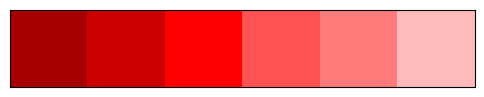

In [2]:
# Set a color scheme
custom_colors=['#a70000','#cc0001','#ff0000','#ff5252','#ff7b7b','#ffbaba']
custom_palette=sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both',labelsize=0,length=0)

In [3]:
# Reading the data
df=pd.read_csv('../dataset/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
# Taking a look at the missing values of the dataset
print(df.isna().sum())
print('-'*10)
print('Total Missing Values = {}'.format(df.isna().sum().sum()))
print('-'*10)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
----------
Total Missing Values = 0
----------


In [5]:
# Taking a look at the statistical summary of the dataset
summary = pd.DataFrame(df.describe())
summary = (
    summary.style.background_gradient(cmap="Reds")
    .set_table_attributes('style="display: inline"')
    .set_caption("Statistics of the Dataset")
    .set_table_styles(
        [{"selector": "caption", "props": [("font-size", "16px")]}]
    )
)
summary

# 探索性数据分析(EDA)

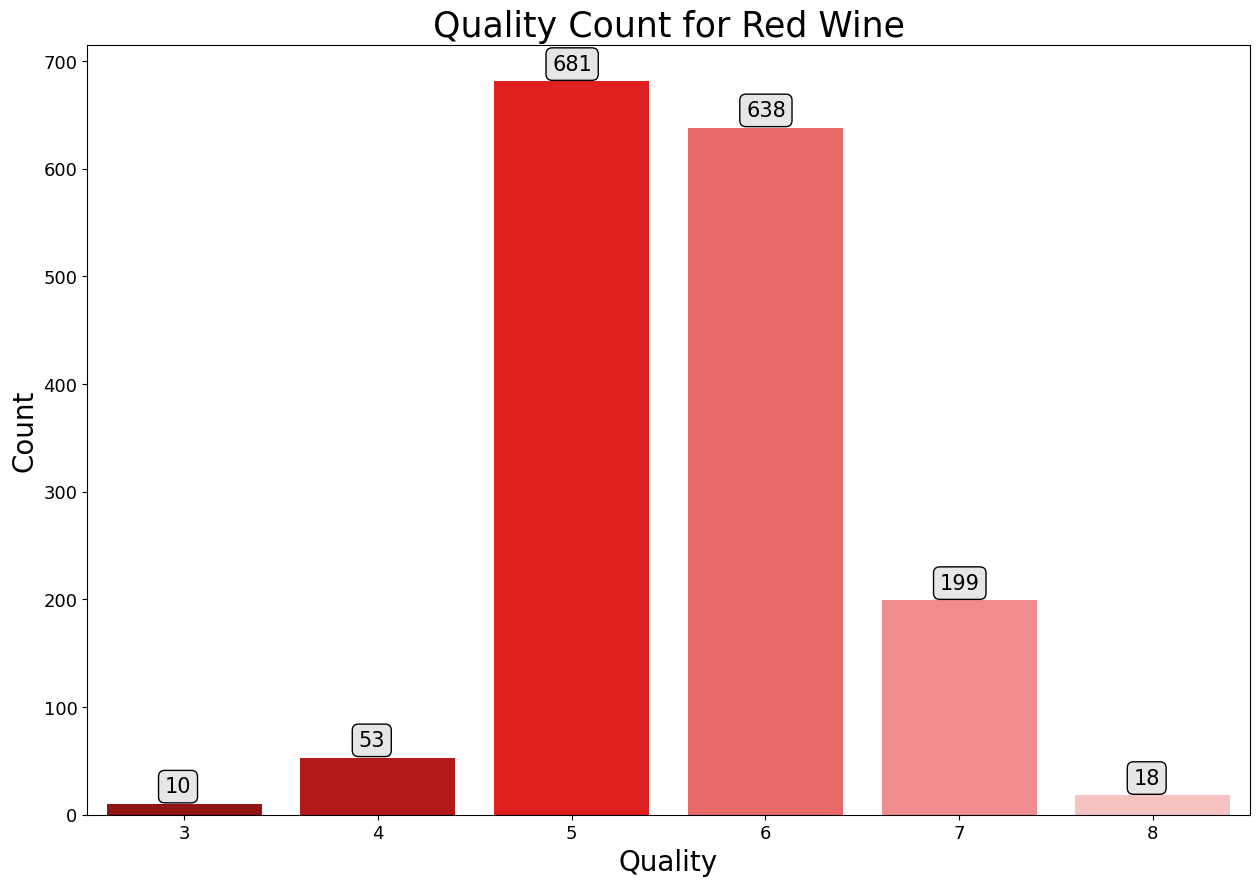

In [6]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(
    data=df,
    x="quality",
    palette=[
        custom_colors[0],
        custom_colors[1],
        custom_colors[2],
        custom_colors[3],
        custom_colors[4],
        custom_colors[5],
    ],
)

bbox_args = dict(boxstyle="round", fc="0.9")
for p in ax.patches:
    ax.annotate(
        "{:.0f}".format(p.get_height()),
        (p.get_x() + 0.3, p.get_height() + 10.5),
        color="black",
        bbox=bbox_args,
        fontsize=15,
    )

plt.title("Quality Count for Red Wine", fontsize=25)
plt.xlabel("Quality", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**观察**: 质量为**5**的红酒是最多的, 质量为**3**的红酒是最少的. 在数据集中有**类
不平衡**, 在开始训练机器学习模型之前需要对其进行修复

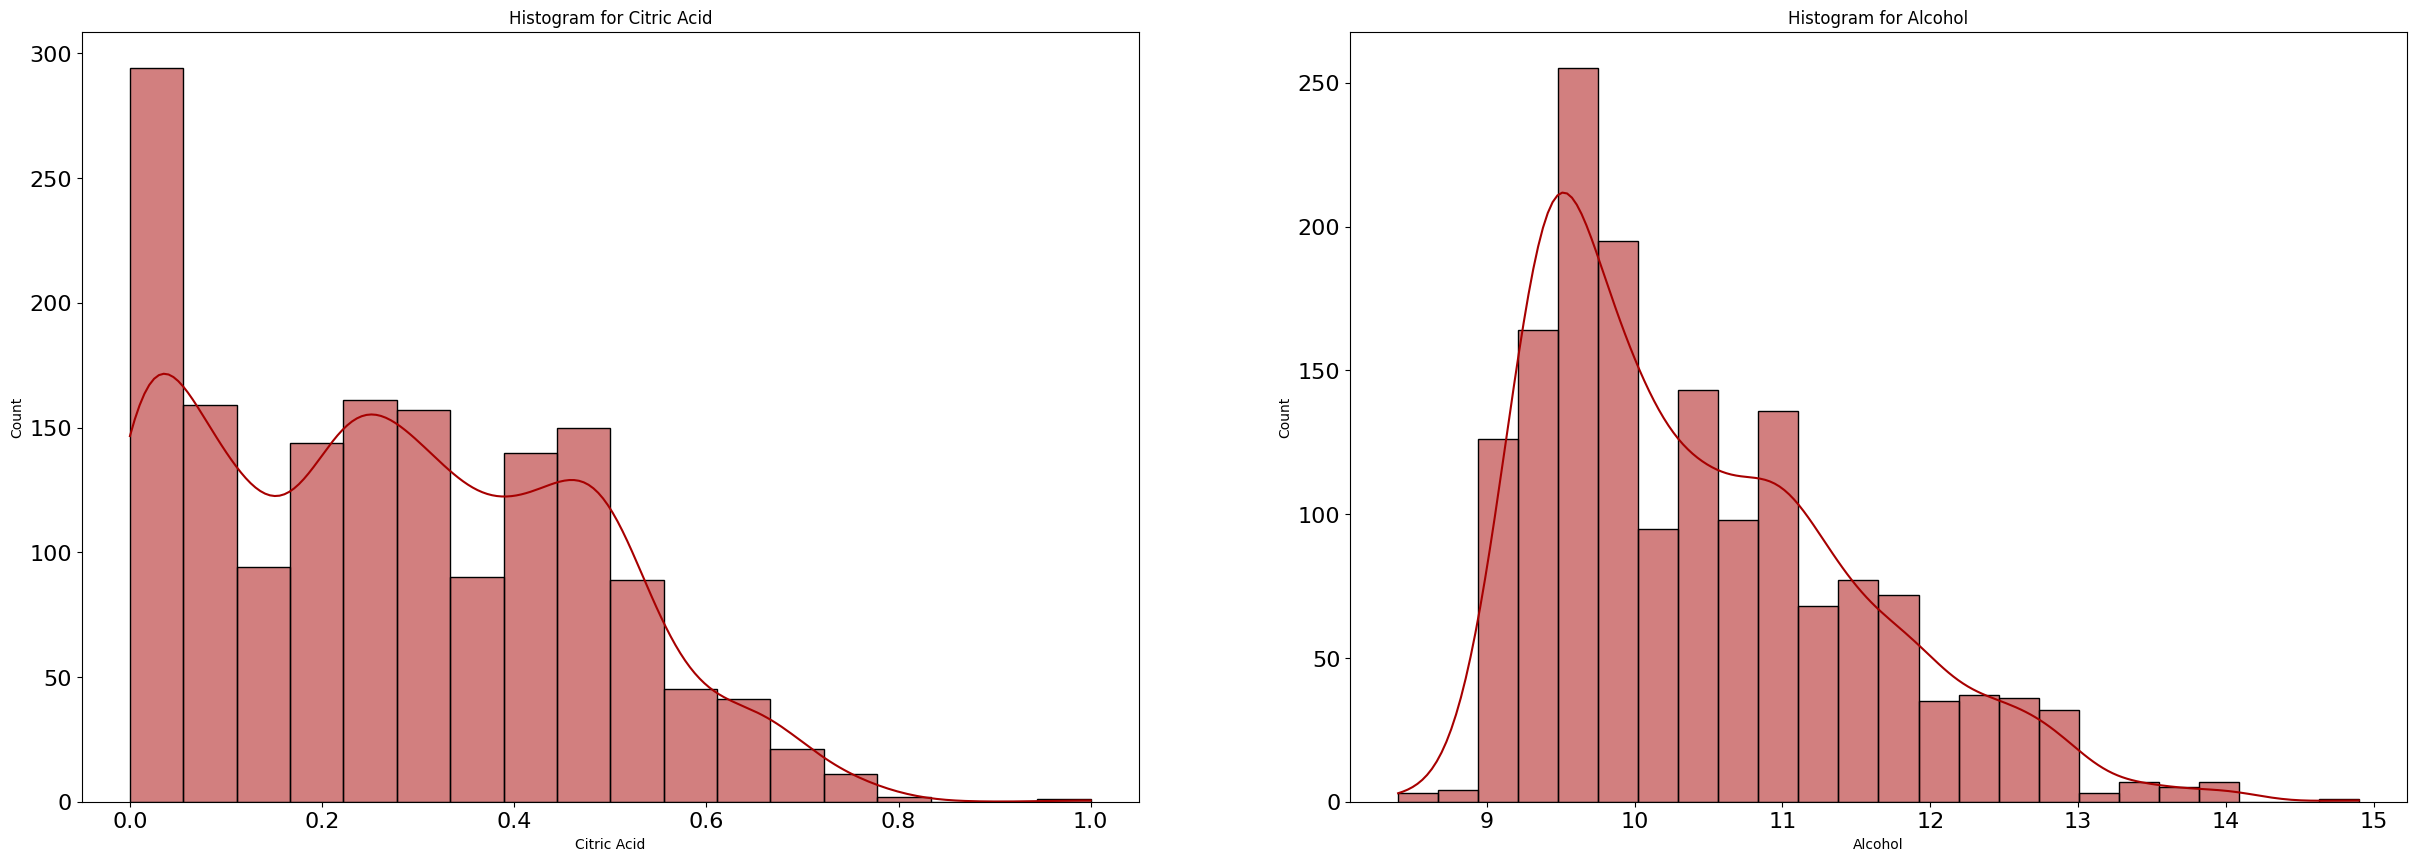

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(30, 10))

sns.histplot(data=df, x="citric acid", kde=True, ax=axes[0])
axes[0].set_title("Histogram for Citric Acid")
axes[0].set_xlabel("Citric Acid")
axes[0].set_ylabel("Count")
axes[0].xaxis.set_tick_params(labelsize=16)
axes[0].yaxis.set_tick_params(labelsize=16)

sns.histplot(data=df, x="alcohol", kde=True, ax=axes[1])
axes[1].set_title("Histogram for Alcohol")
axes[1].set_xlabel("Alcohol")
axes[1].set_ylabel("Count")
axes[1].xaxis.set_tick_params(labelsize=16)
axes[1].yaxis.set_tick_params(labelsize=16)

plt.show()

**观察**: 绘制柠檬酸和酒精的直方图以查看其分布的偏度。酒精直方图呈现右偏态，其中众数 < 中值 < 平均值。

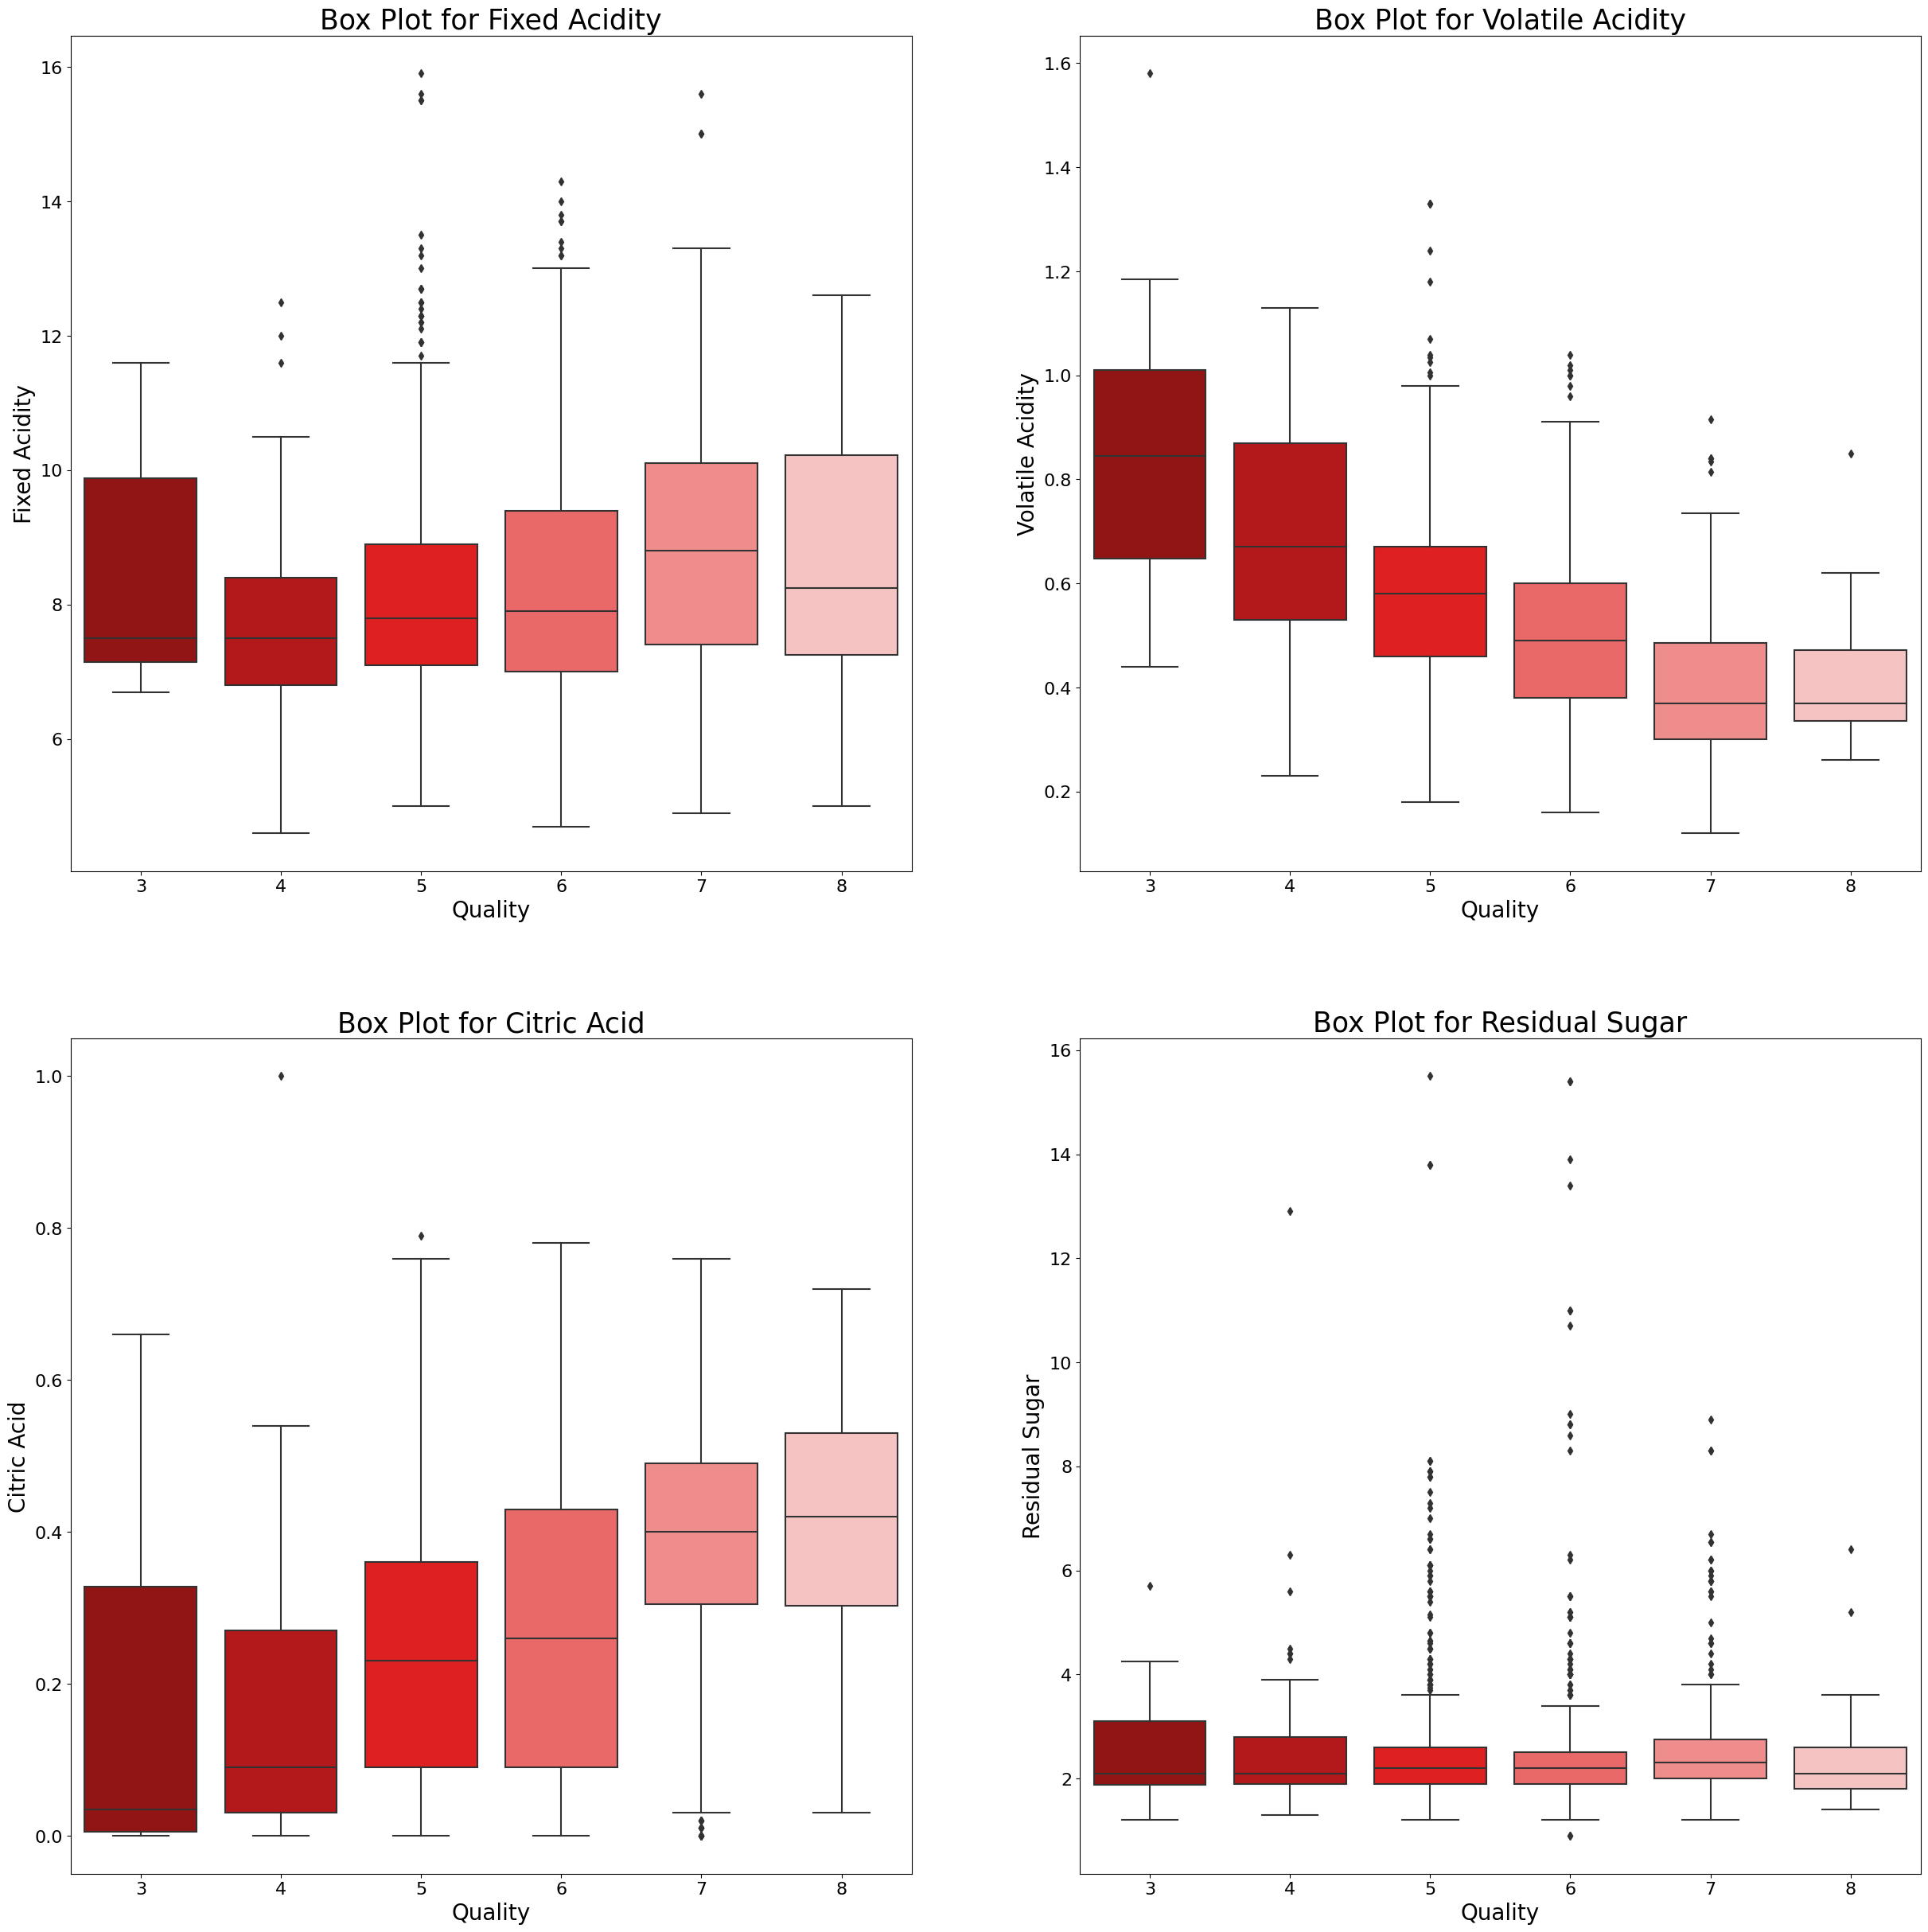

In [8]:
# BoxPlots
plt.figure(figsize=(30,30))

def create_boxplot(feature):
    sns.boxplot(data=df,x=df['quality'],y=feature)
    plt.title('Box Plot for '+feature.title(),fontsize=25)
    plt.xlabel('Quality',fontsize=20)
    plt.ylabel(feature.title(),fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
plt.subplot(221)
create_boxplot('fixed acidity')

plt.subplot(222)
create_boxplot('volatile acidity')

plt.subplot(223)
create_boxplot('citric acid')

plt.subplot(224)
create_boxplot('residual sugar')

**观察**:

- 固定酸度：对于不同品质的葡萄酒，固定酸度的箱线图具有大致相同的中值。质量为 5 的葡萄酒的异常值最高。
- 挥发酸度：随着葡萄酒质量的提高，我们可以观察到葡萄酒挥发酸度的中值下降。
- 柠檬酸：随着葡萄酒质量的提高，我们可以观察到葡萄酒柠檬酸的中值增加。这与我们在分析葡萄酒的挥发酸度时获得的观察结果完全相反。
- 残糖：不同品质的葡萄酒，残糖的中值几乎相同。质量为 5 或 6 的葡萄酒的异常值数量最多。


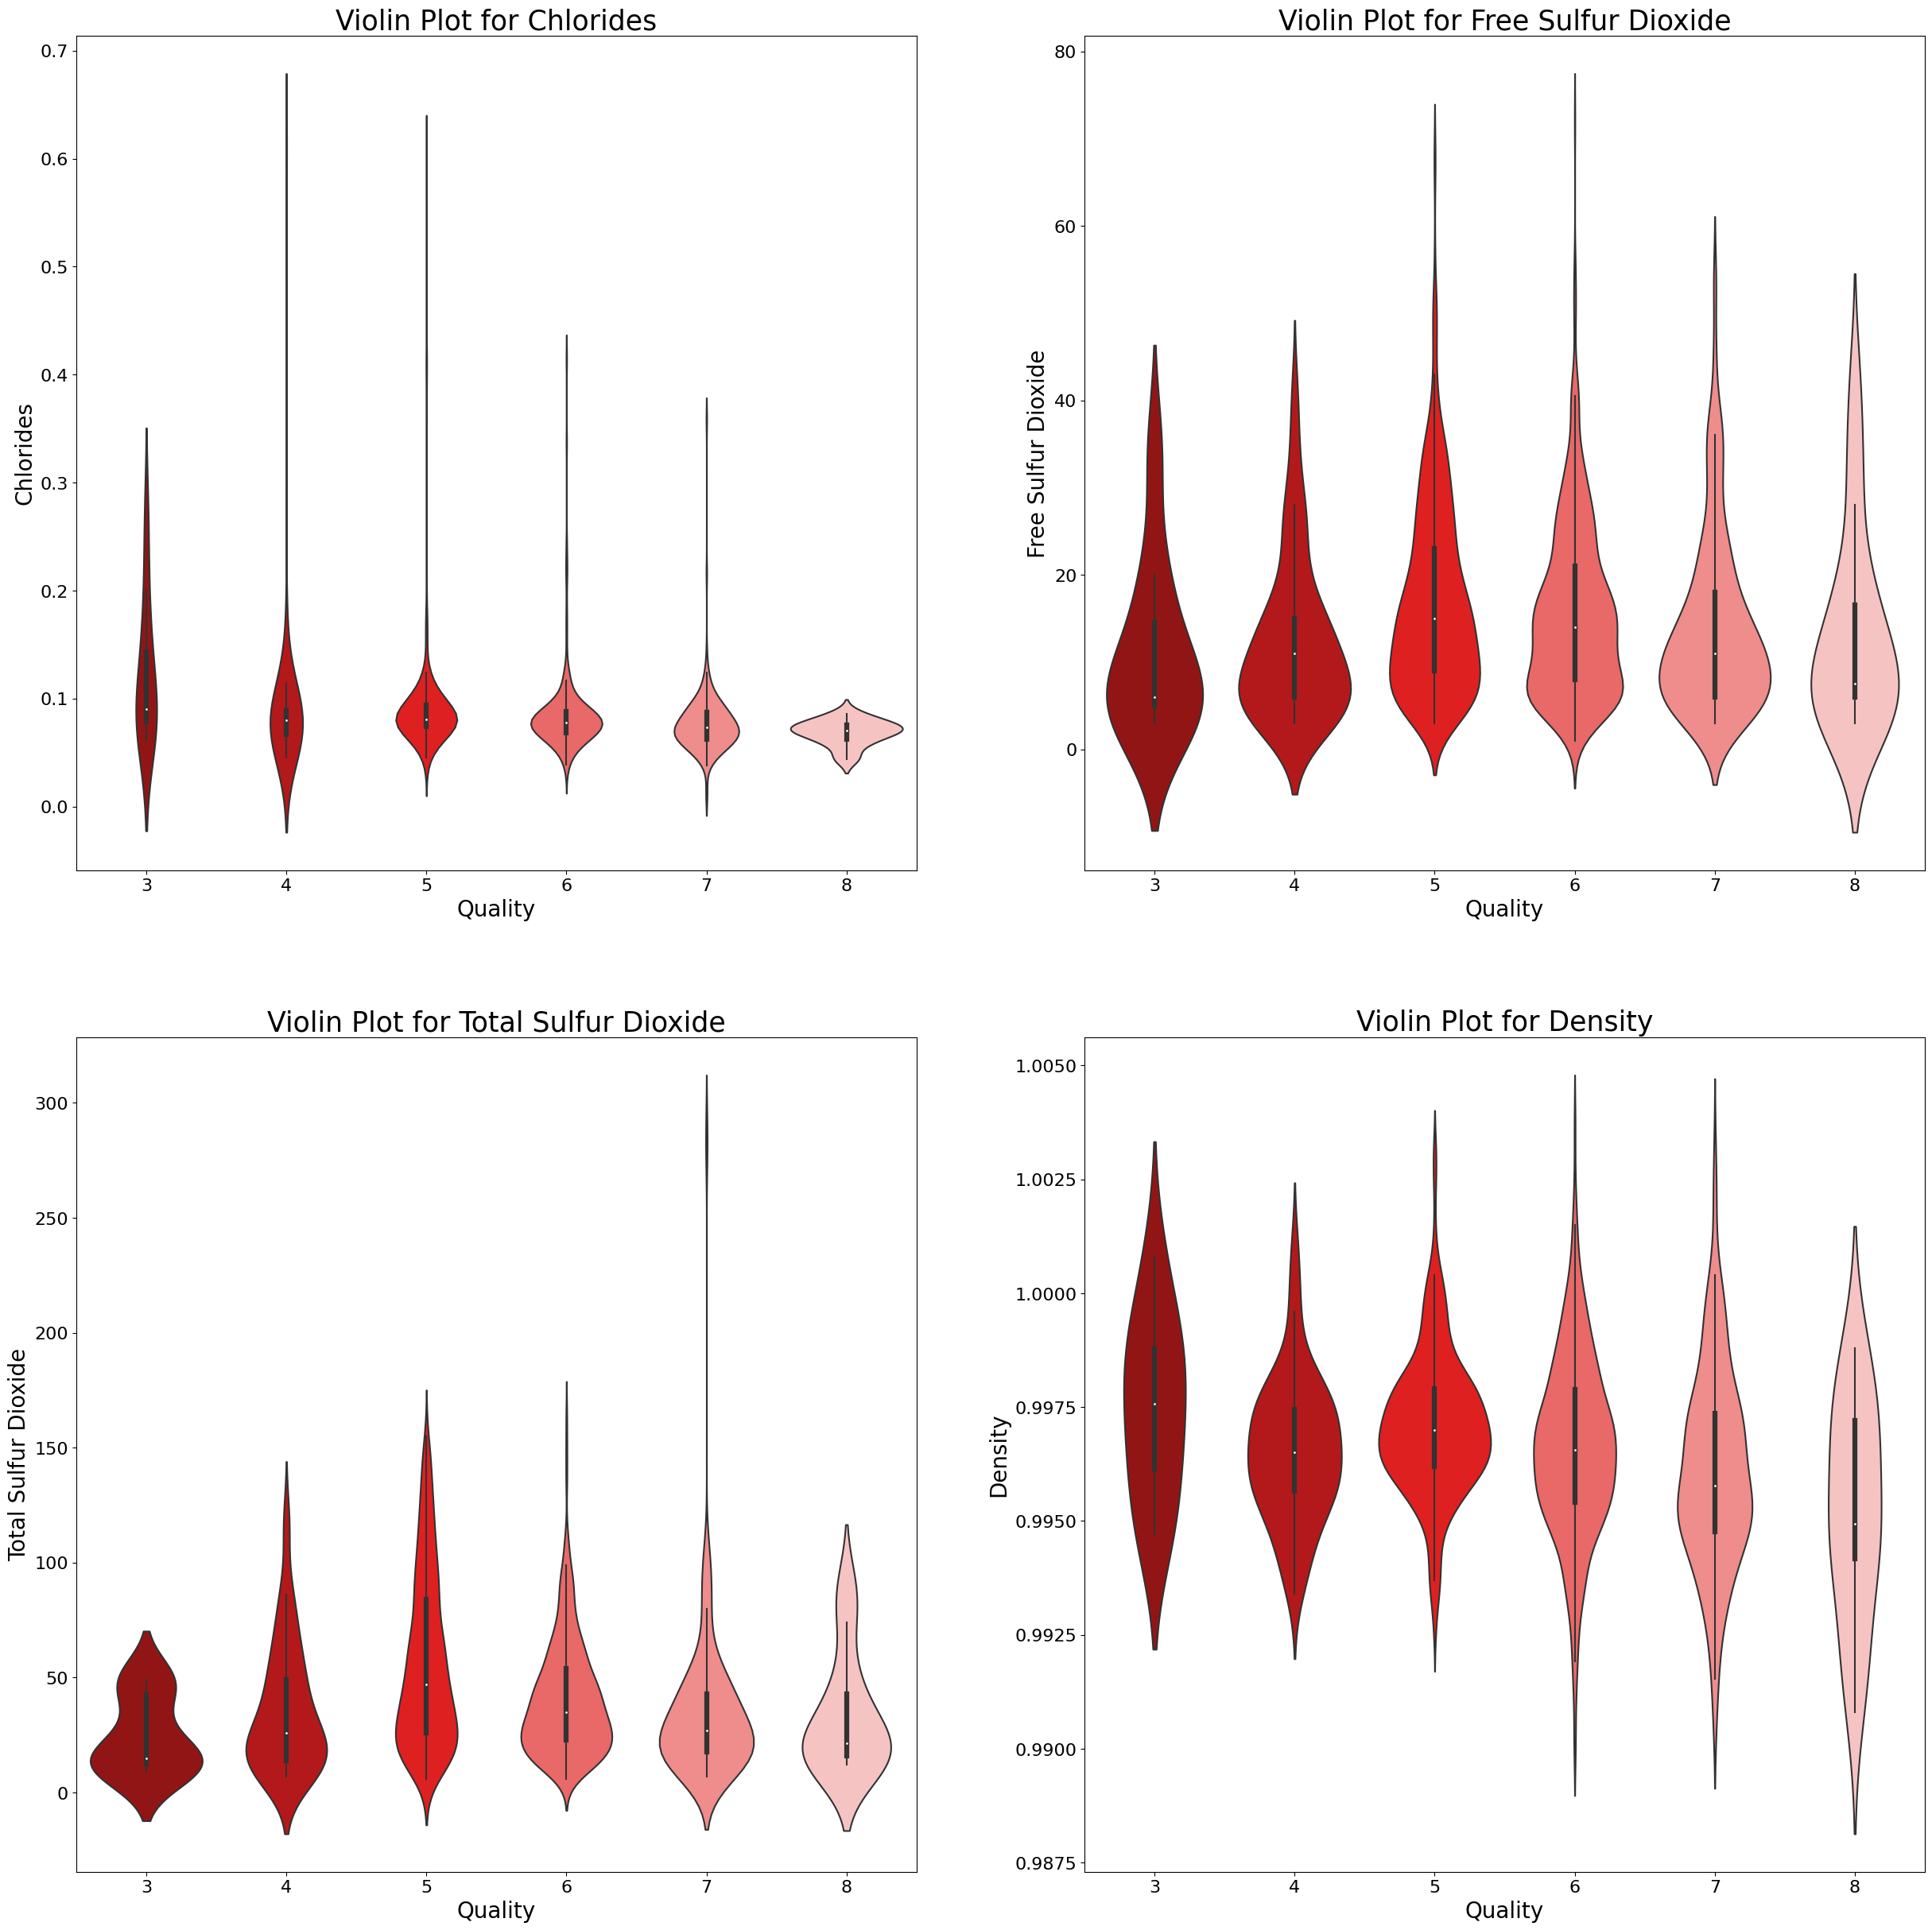

In [9]:
# Violin plots
plt.figure(figsize=(30,30))

def create_violinplot(feature):
    sns.violinplot(data=df,x=df['quality'],y=feature)
    plt.title('Violin Plot for '+feature.title(),fontsize=25)
    plt.xlabel('Quality',fontsize=20)
    plt.ylabel(feature.title(),fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

plt.subplot(221)
create_violinplot('chlorides')

plt.subplot(222)
create_violinplot('free sulfur dioxide')

plt.subplot(223)
create_violinplot('total sulfur dioxide')

plt.subplot(224)
create_violinplot('density')

**观察**
- 氯化物：不同类型葡萄酒品质的氯化物中值是相同的。
- 游离二氧化硫：品质为5的葡萄酒中游离二氧化硫的中值最高。
- 总二氧化硫：总二氧化硫IQR最高的是品质为5的葡萄酒。
- 密度：品质为 3 的葡萄酒具有最高的密度中值。

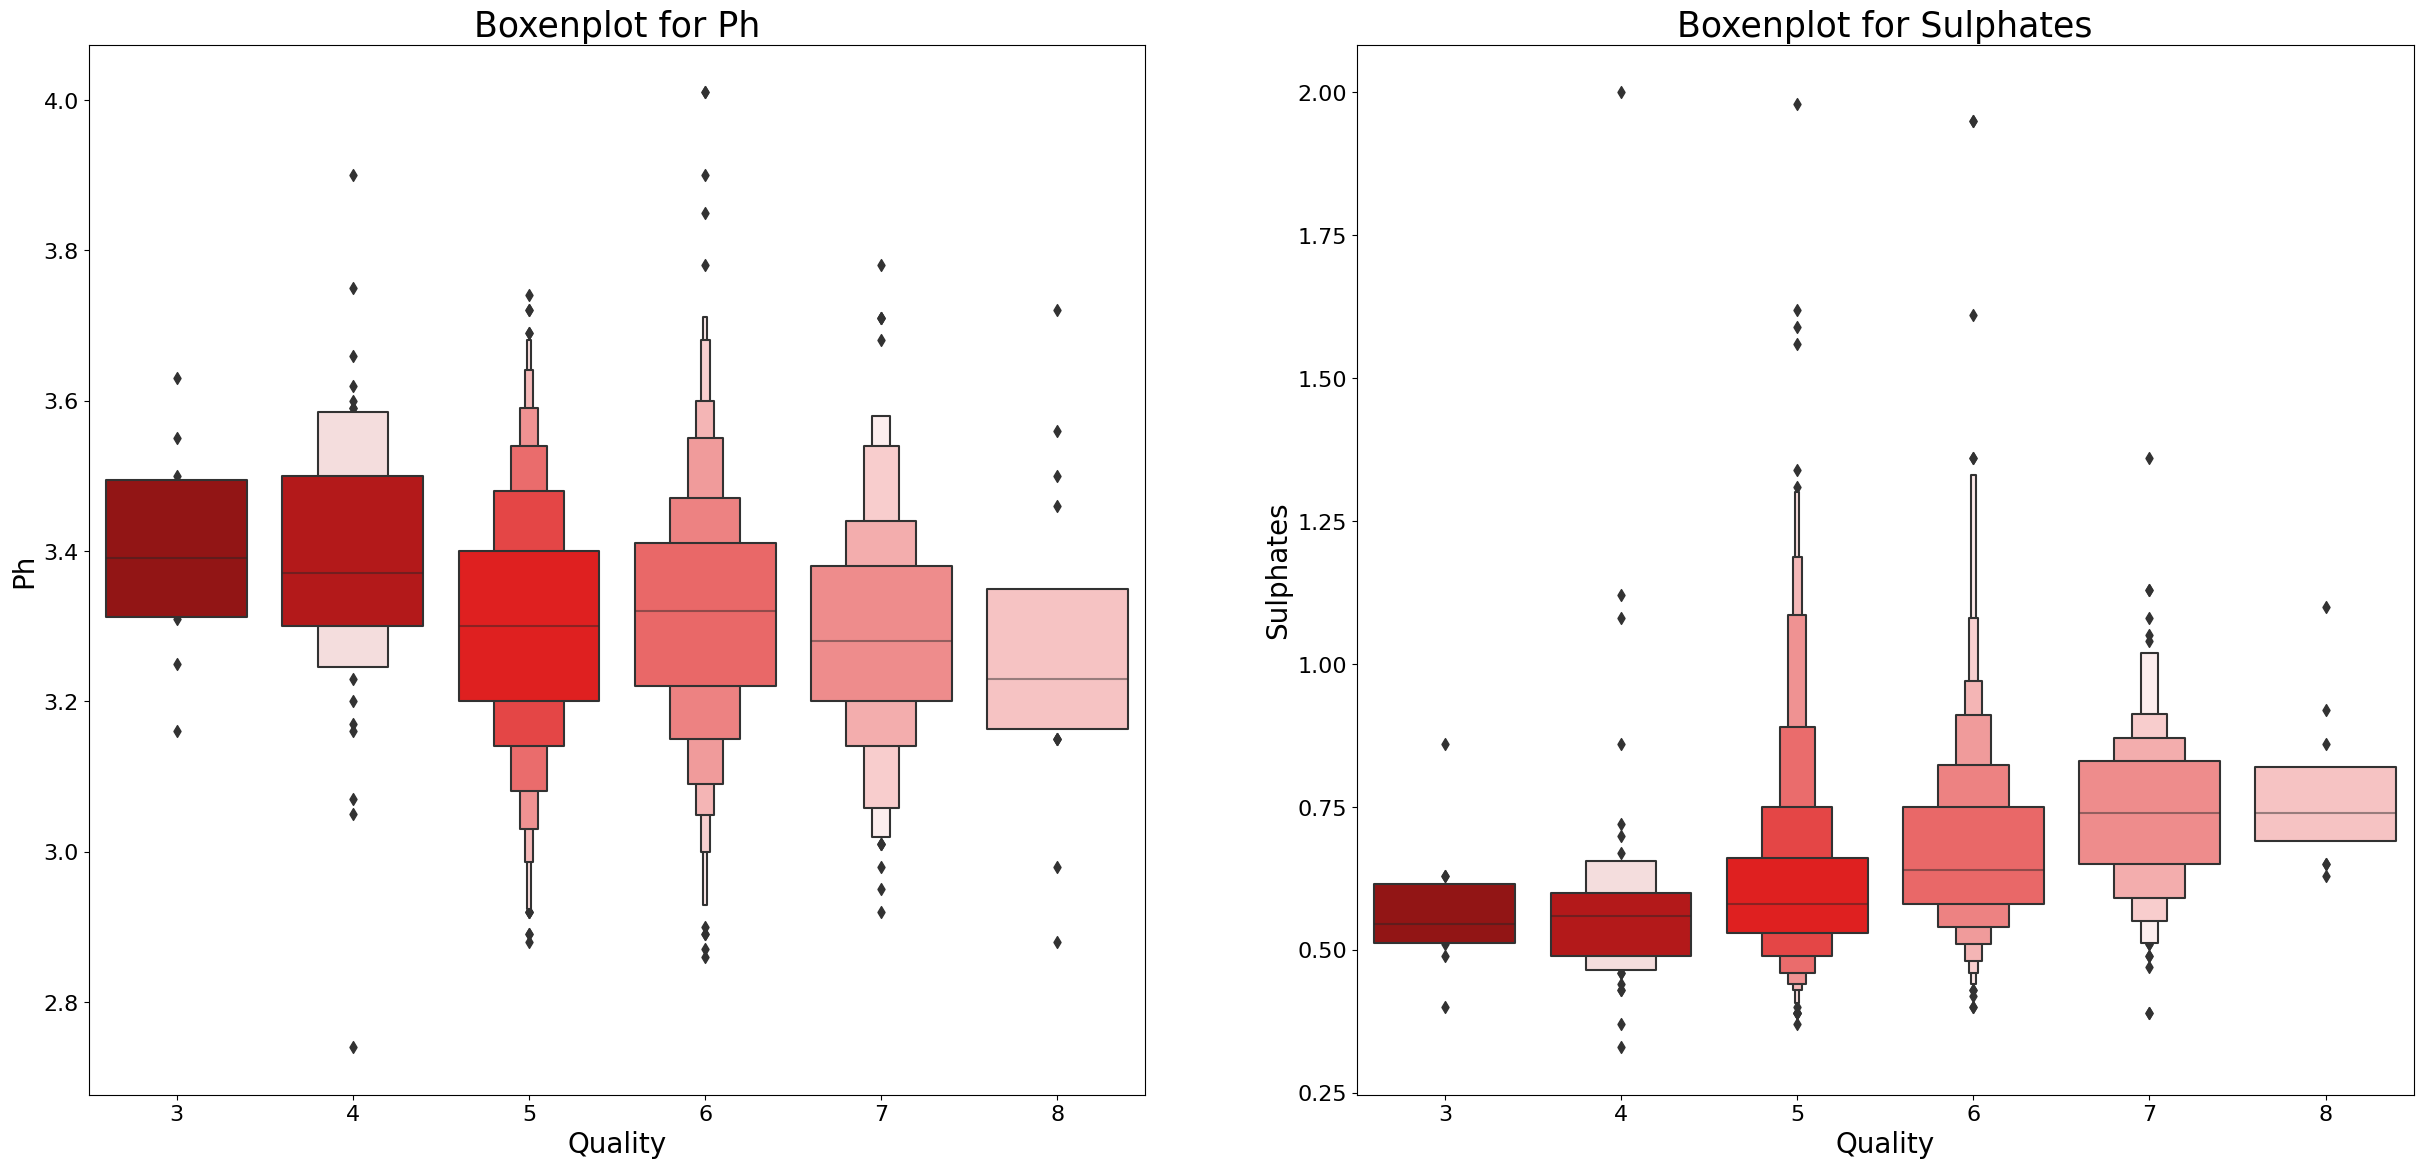

In [10]:
# boxen plots
plt.figure(figsize=(30, 30))


def create_boxenplot(feature):
    sns.boxenplot(data=df, x=df["quality"], y=feature)
    plt.title("Boxenplot for " + feature.title(), fontsize=25)
    plt.xlabel("Quality", fontsize=20)
    plt.ylabel(feature.title(), fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
plt.subplot(221)
create_boxenplot('pH')

plt.subplot(222)
create_boxenplot('sulphates')

**观察**
- pH: pH的中位数随着品质上升而下降. 具有质量5和6的红酒相比其他有更长的头和尾
- 硫酸盐: 随着品质上升, 硫酸盐含量上升. 和pH类似, 品质为5和6的红酒有更长的头和尾

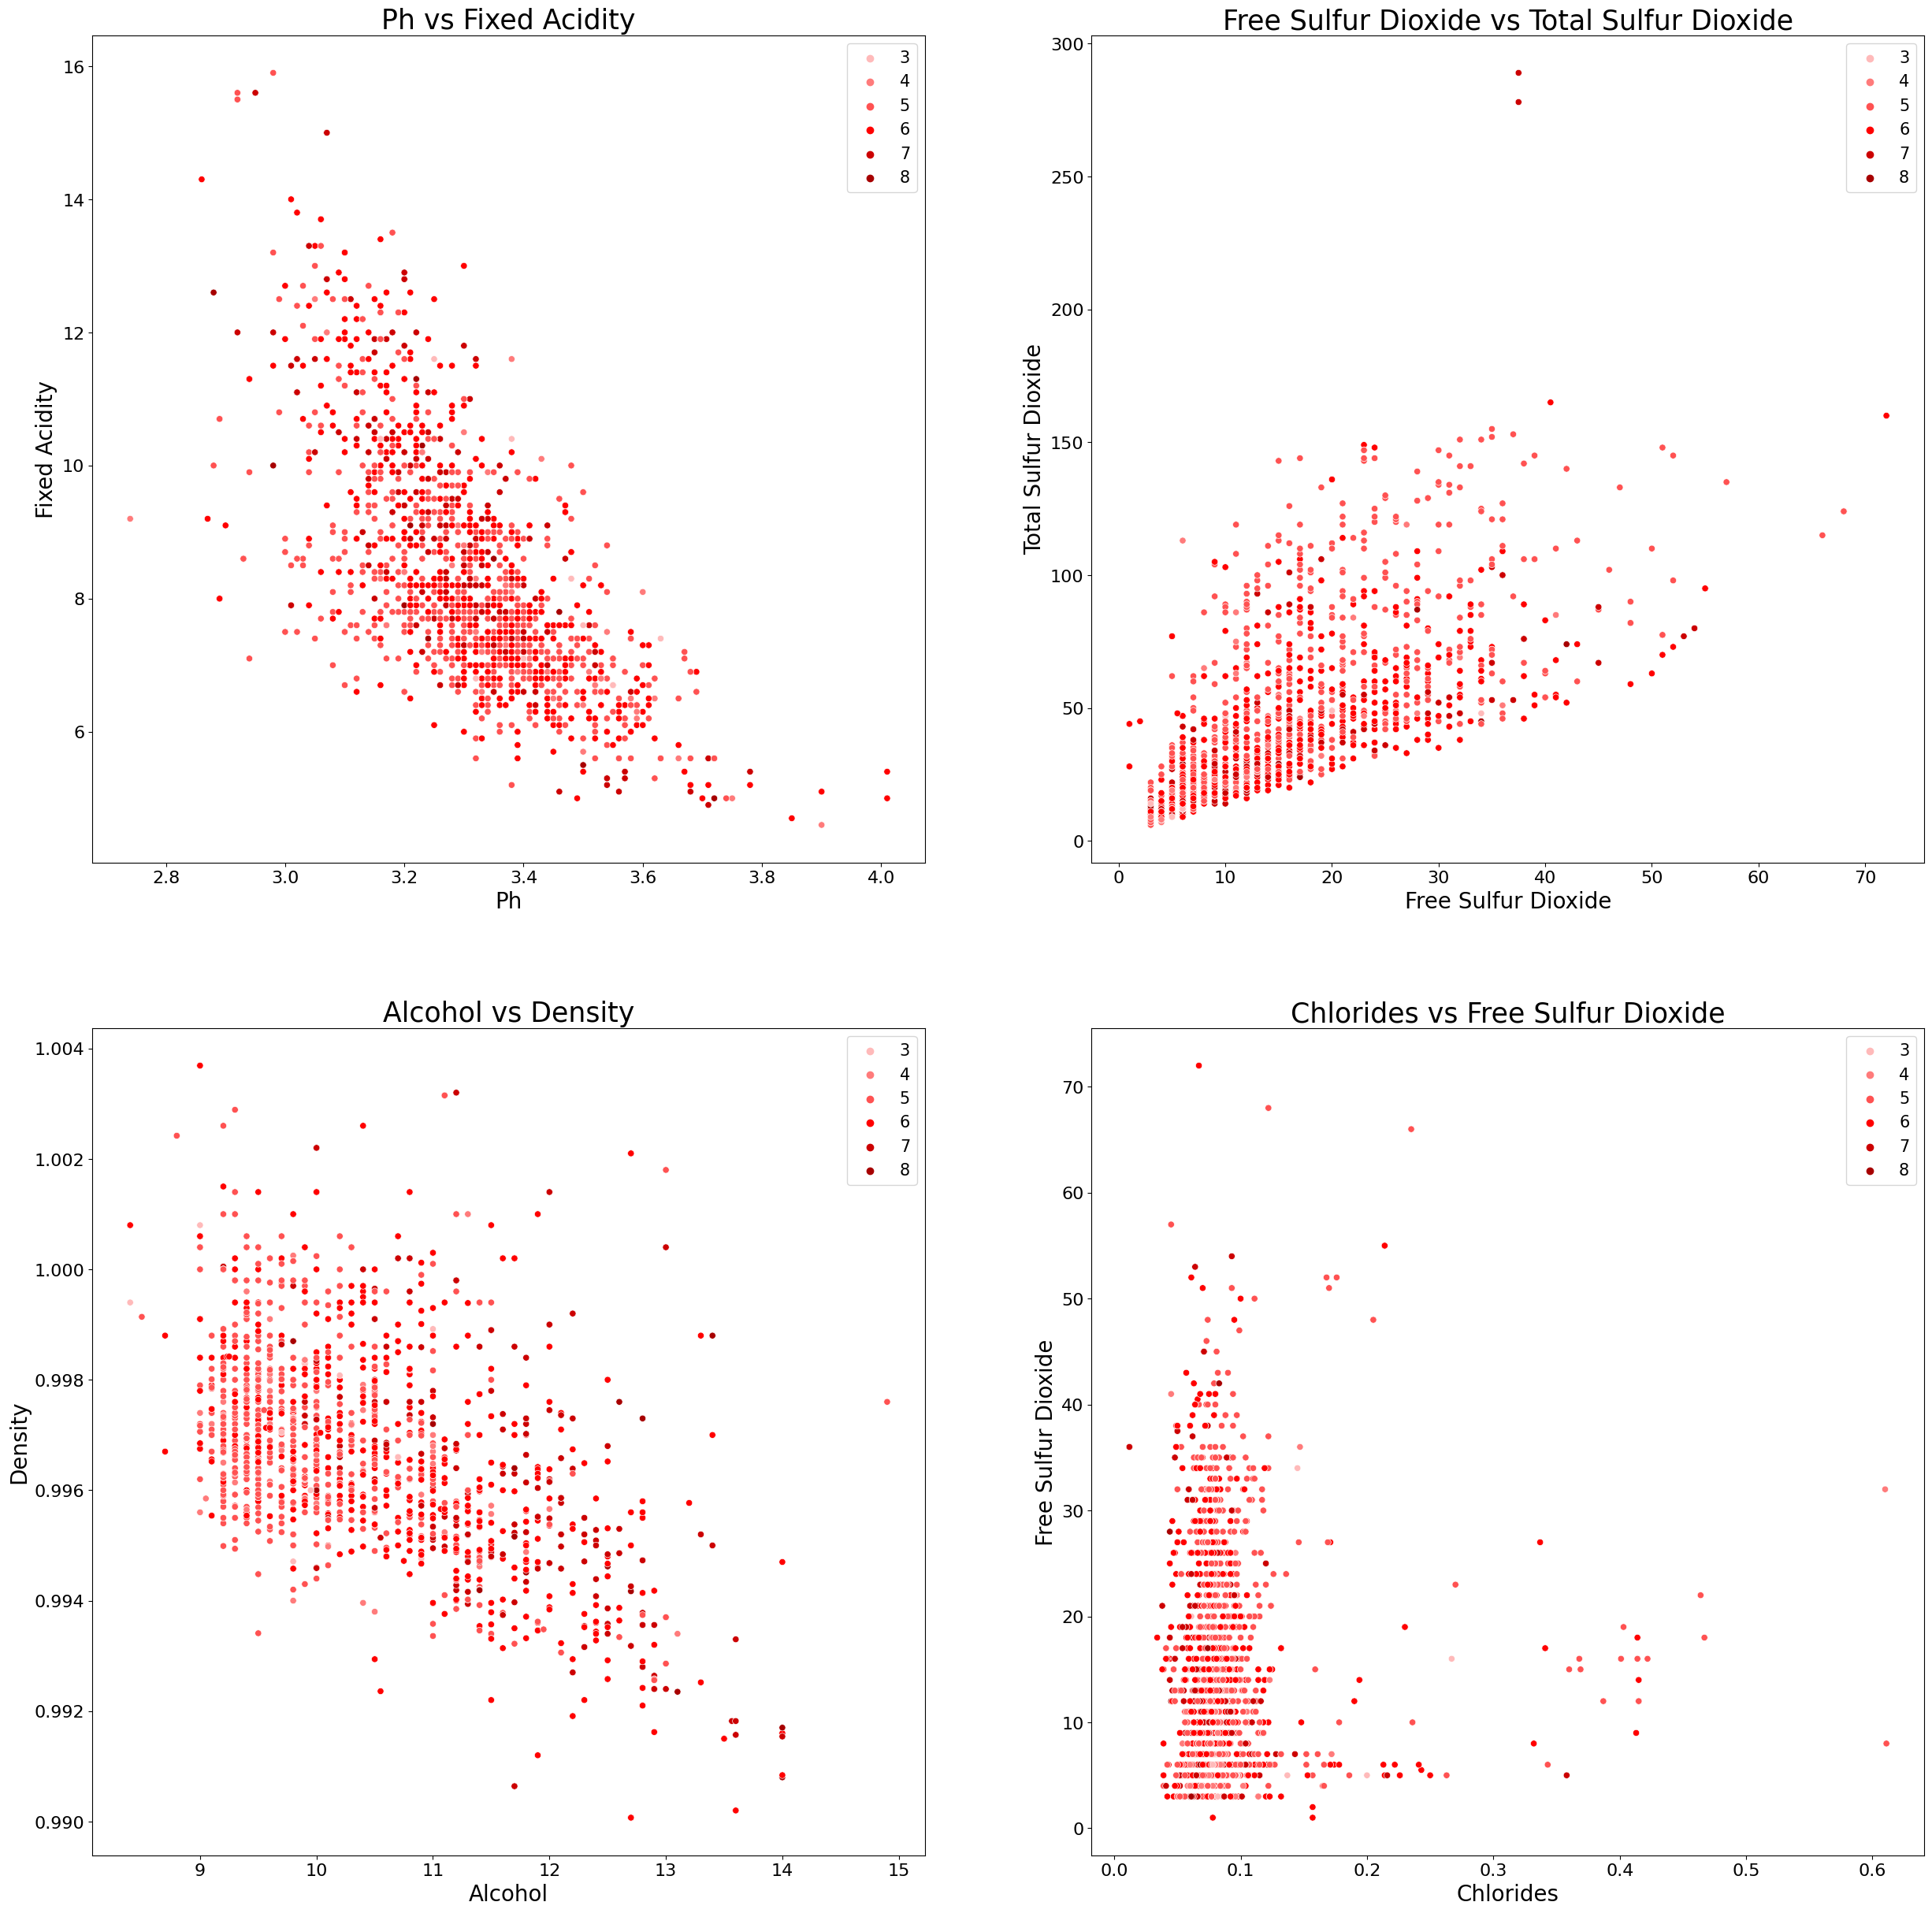

In [11]:
# scatter plots
plt.figure(figsize=(30, 30))


def create_scatterplot(feature1, feature2):
    sns.scatterplot(
        data=df,
        x=feature1,
        y=feature2,
        hue=df["quality"],
        palette=[
            custom_colors[-1],
            custom_colors[-2],
            custom_colors[-3],
            custom_colors[-4],
            custom_colors[-5],
            custom_colors[-6],
        ],
    )
    plt.title(feature1.title()+' vs '+feature2.title(),fontsize=25)
    plt.legend(fontsize=15)
    plt.xlabel(feature1.title(),fontsize=20)
    plt.ylabel(feature2.title(),fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
plt.subplot(221)
create_scatterplot('pH','fixed acidity')

plt.subplot(222)
create_scatterplot('free sulfur dioxide','total sulfur dioxide')

plt.subplot(223)
create_scatterplot('alcohol','density')

plt.subplot(224)
create_scatterplot('chlorides','free sulfur dioxide')

plt.show()

**观察**
- pH vs 固定酸度: pH和固定酸度之间有强负相关性
- 游离二氧化硫 vs 总二氧化硫: 有一定的正相关性
- 酒精 vs 密度: 负相关性
- 氯化物 vs 二氧化硫: 没有可以分辨的相关性

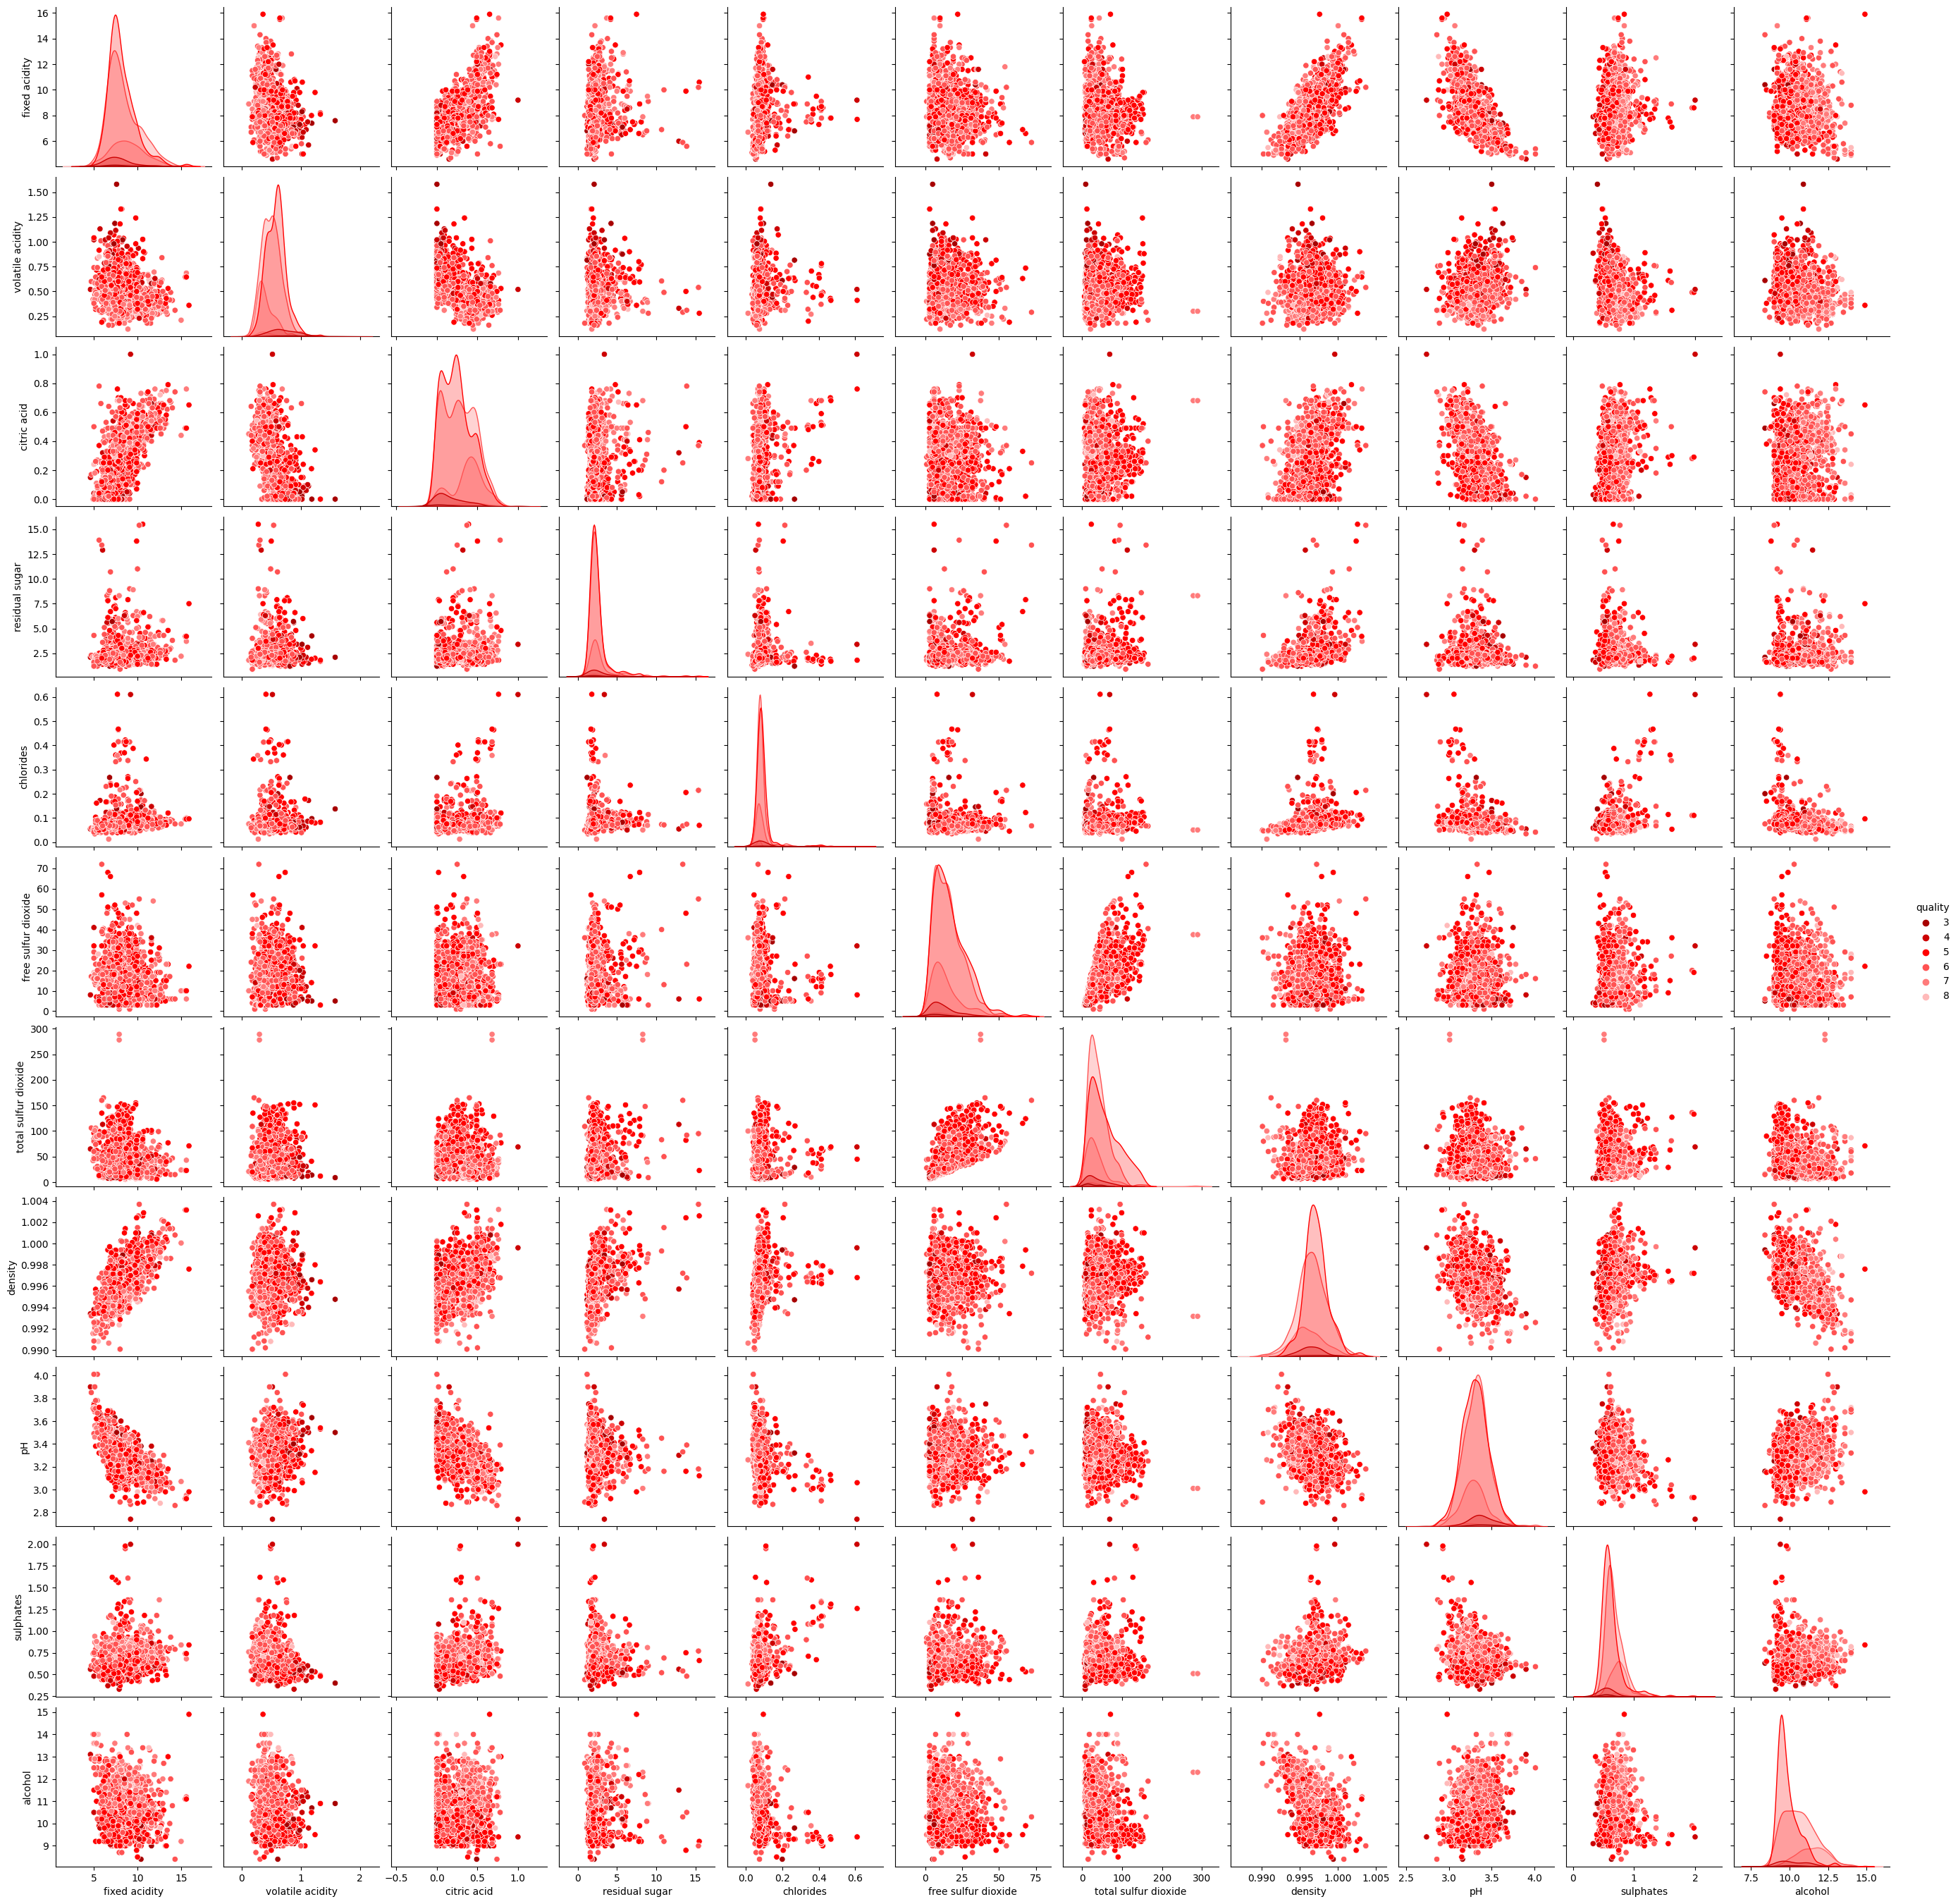

In [12]:
# Pair plots
sns.pairplot(
    data=df,
    hue="quality",
    palette=[
        custom_colors[0],
        custom_colors[1],
        custom_colors[2],
        custom_colors[3],
        custom_colors[4],
        custom_colors[5],
    ],
)
plt.show()

# 检查相关性

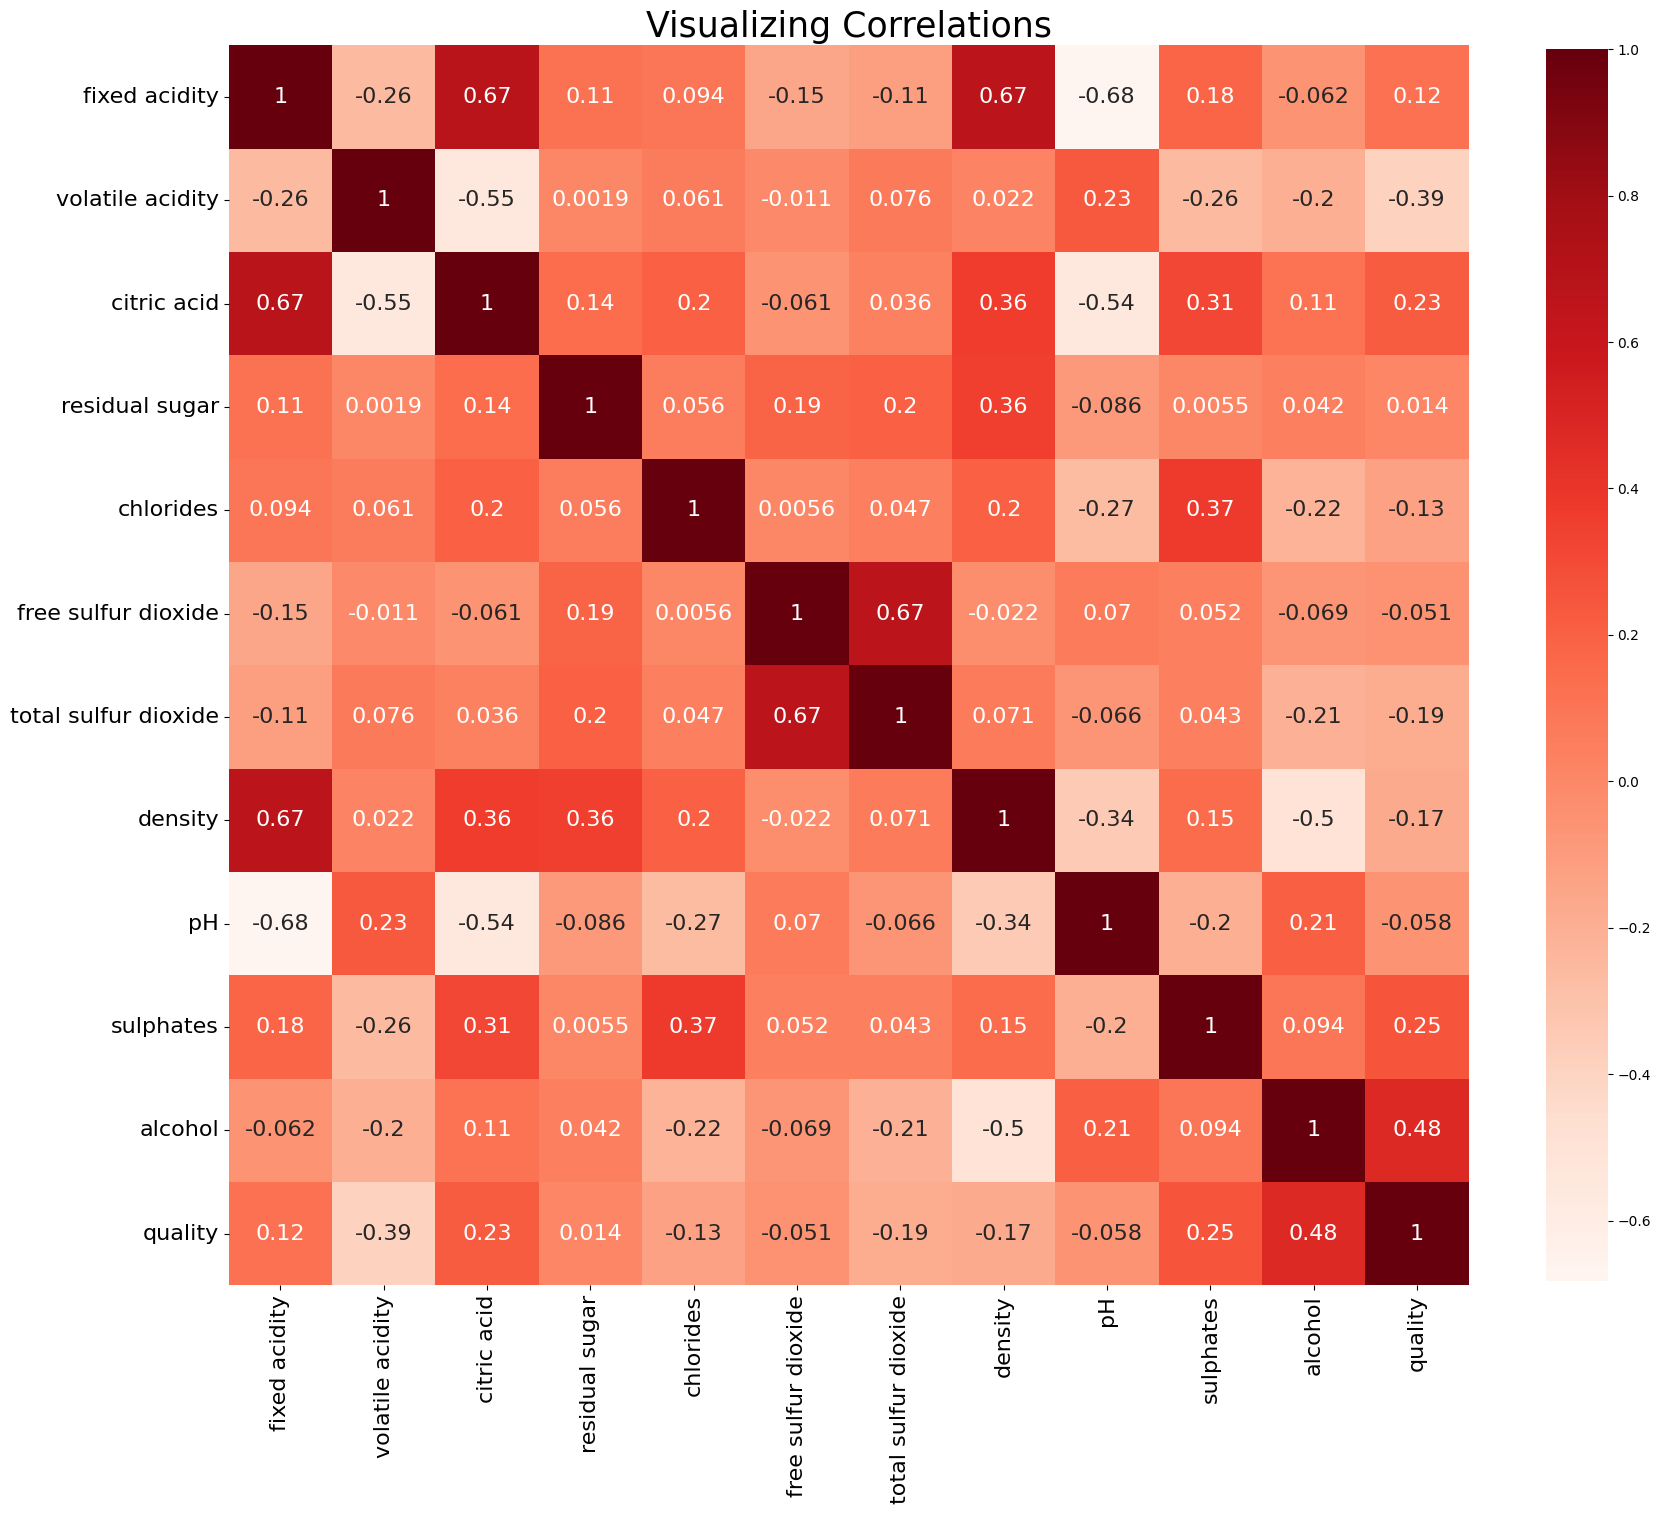

In [13]:
# correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(
    df.corr(),
    cmap="Reds",
    square=True,
    annot=True,
    annot_kws={"size": 16},
    cbar_kws={"shrink": 0.80},
)
plt.title('Visualizing Correlations',size=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# 修复类不平衡
为了纠正数据集中的类不平衡, 需要使用binning. 将数据集区分为`坏`和`好`两种品质的
酒, 使得坏品质的酒喝好品质的酒的数量大致相同

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

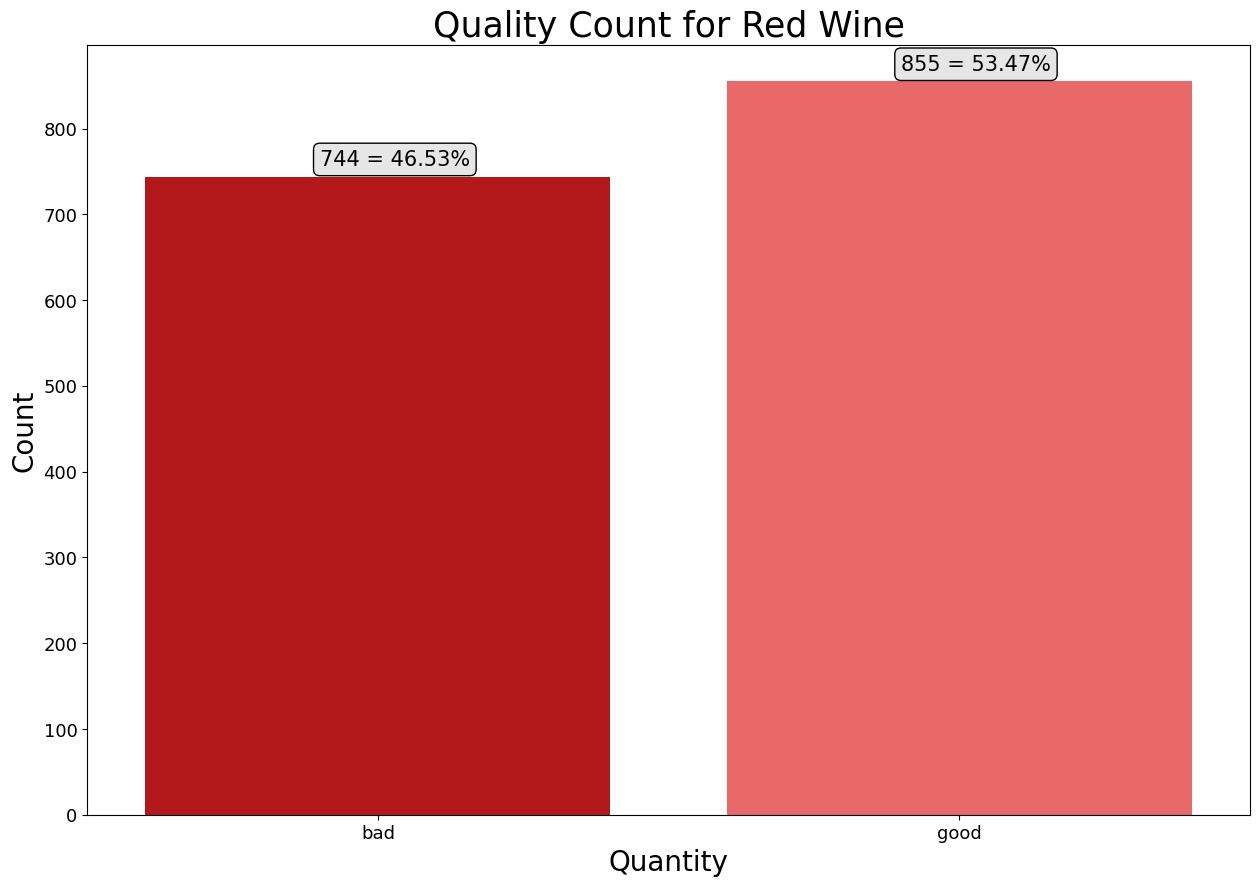

In [14]:
print(df.head())
df["quality"] = pd.cut(df["quality"], bins=[1, 5, 10], labels=["bad", "good"])

plt.figure(figsize=(15, 10))
ax = sns.countplot(
    x="quality", data=df, palette=[custom_colors[1], custom_colors[-3]]
)
bbox_args = dict(boxstyle="round", fc="0.9")
for p in ax.patches:
    ax.annotate(
        "{:.0f} = {:.2f}%".format(
            p.get_height(), (p.get_height() / len(df["quality"])) * 100
        ),
        (p.get_x() + 0.3, p.get_height() + 13),
        color="black",
        bbox=bbox_args,
        fontsize=15,
    )

plt.title("Quality Count for Red Wine", fontsize=25)
plt.xlabel("Quantity", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# 对标签进行编码

In [15]:
label_encoder=LabelEncoder()
df['quality']=label_encoder.fit_transform(df['quality'])
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

# 对数据缩放

StandardScaler 可以通过减去平均值, 并缩放导单位方差内对一个特征进行缩放.

$$
z=\frac{x-\mu}{\theta} \\
\mu = \text{Mean} \\
\theta = \text{Standard Deviation}
$$


In [16]:
print(df.head())
scaler=StandardScaler()
features=[features for features in df.columns if df[features].dtype!=int]
df[features]=scaler.fit_transform(df[features])
df

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality  
0     -0.579207 -0.960246        0  
1      0.128950 -0.584777        0  
2     -0.048089 -0.584777        0  
3     -0.461180 -0.584777        1  
4     -0.579207 -0.960246        0  
...         ...       ...      ...  
1594  -0.461180  0.072294        0  
1595   0.601055  0.729364        1  
1596   0.542042  0.541630        1  
1597   0.305990 -0.209308        0  
1598   0.010924  0.541630        1  

[1599 rows x 12 columns]

In [17]:
# Split Features and Target
X=df.drop('quality',axis=1)
y=df['quality']
print(X,'\n\n\n',y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  

# 训练集和测试集划分

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

# 训练机器学习模型

---For Logistic Regression---
Training Accuracy: 73.88584831899921%
Testing Accuracy: 76.875%
F1 Score: 0.783625730994152




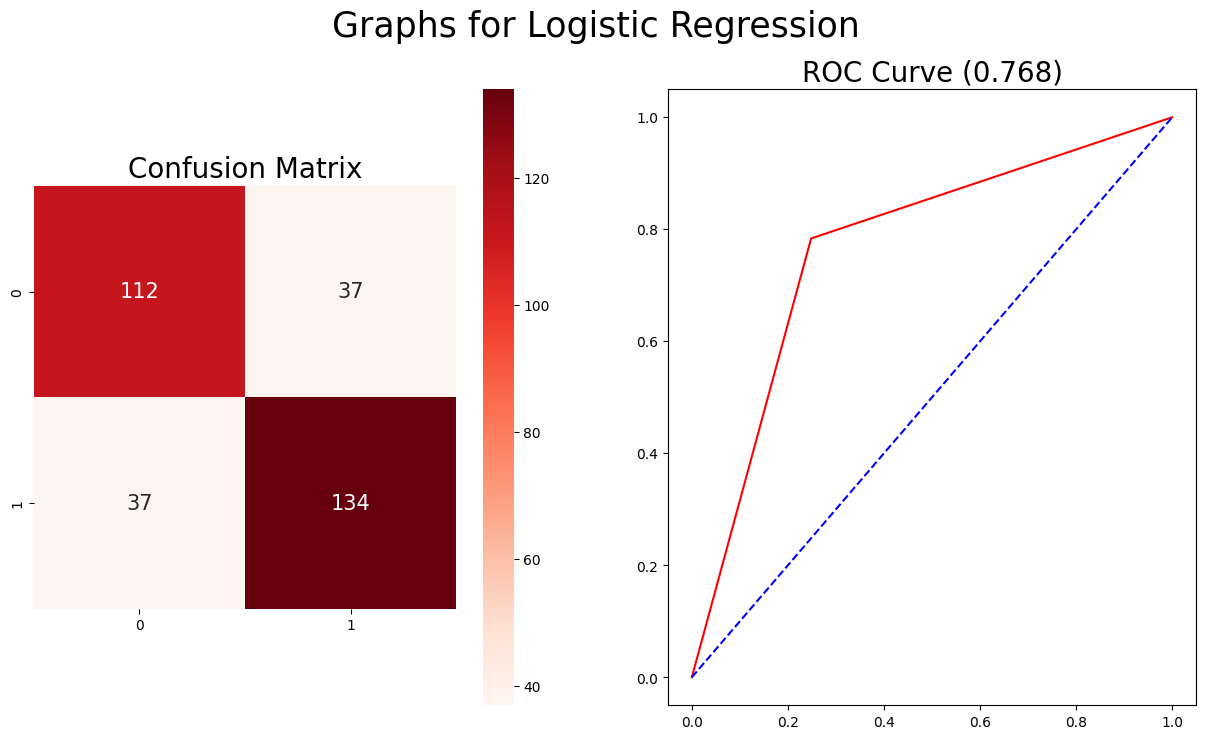

---For K Nearest Neighbors---
Training Accuracy: 77.79515246286161%
Testing Accuracy: 75.9375%
F1 Score: 0.7806267806267805




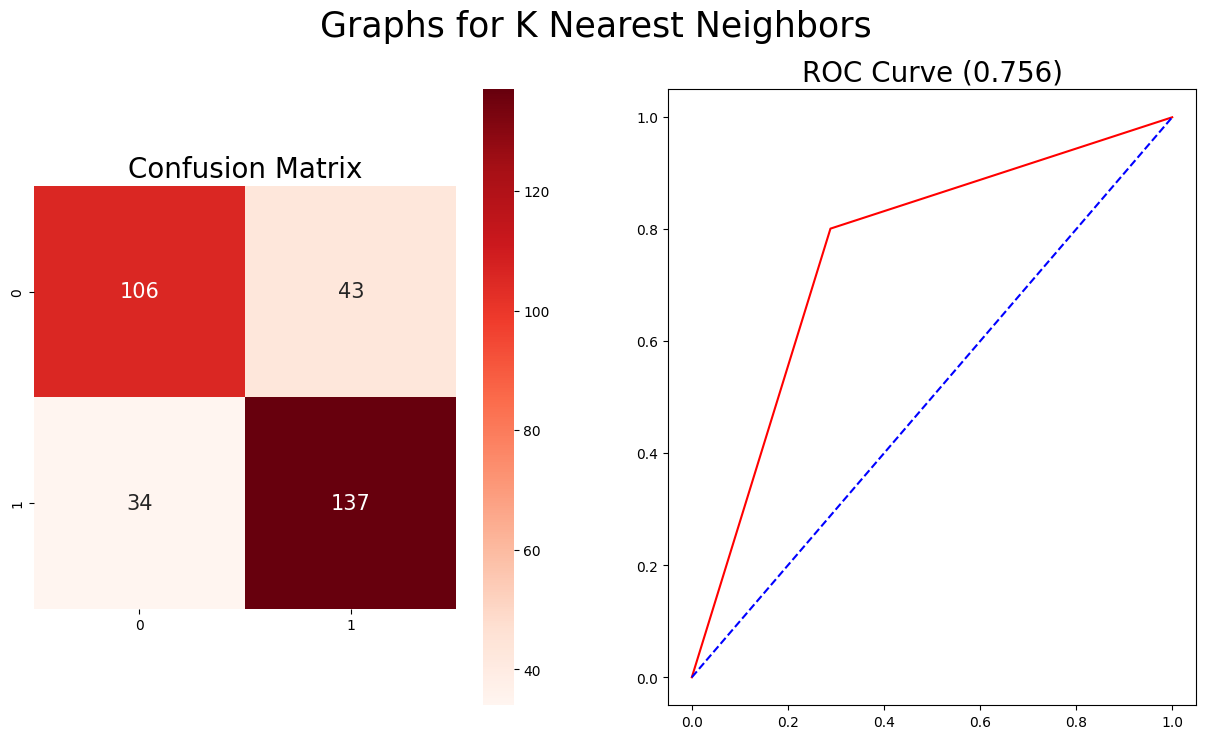

---For Support Vector Classifier---
Training Accuracy: 78.65519937451134%
Testing Accuracy: 79.375%
F1 Score: 0.8047337278106509




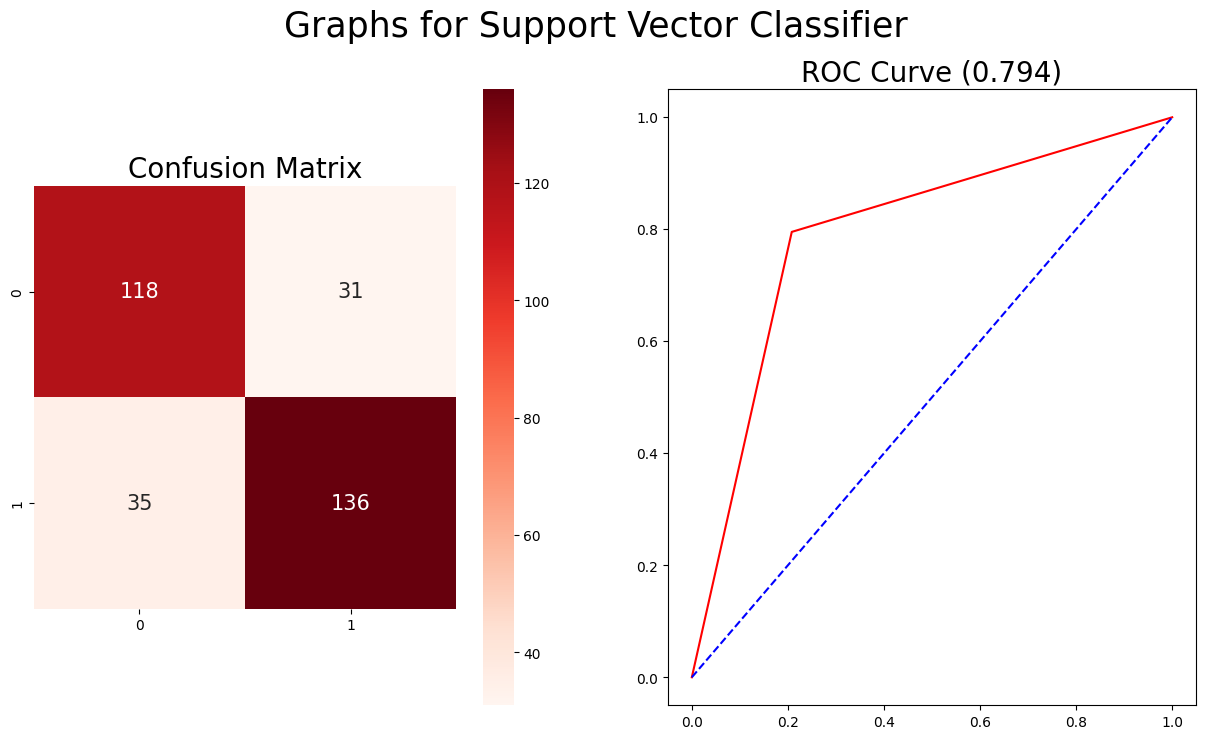

---For Decision Tree Classifier---
Training Accuracy: 100.0%
Testing Accuracy: 77.5%
F1 Score: 0.7906976744186047




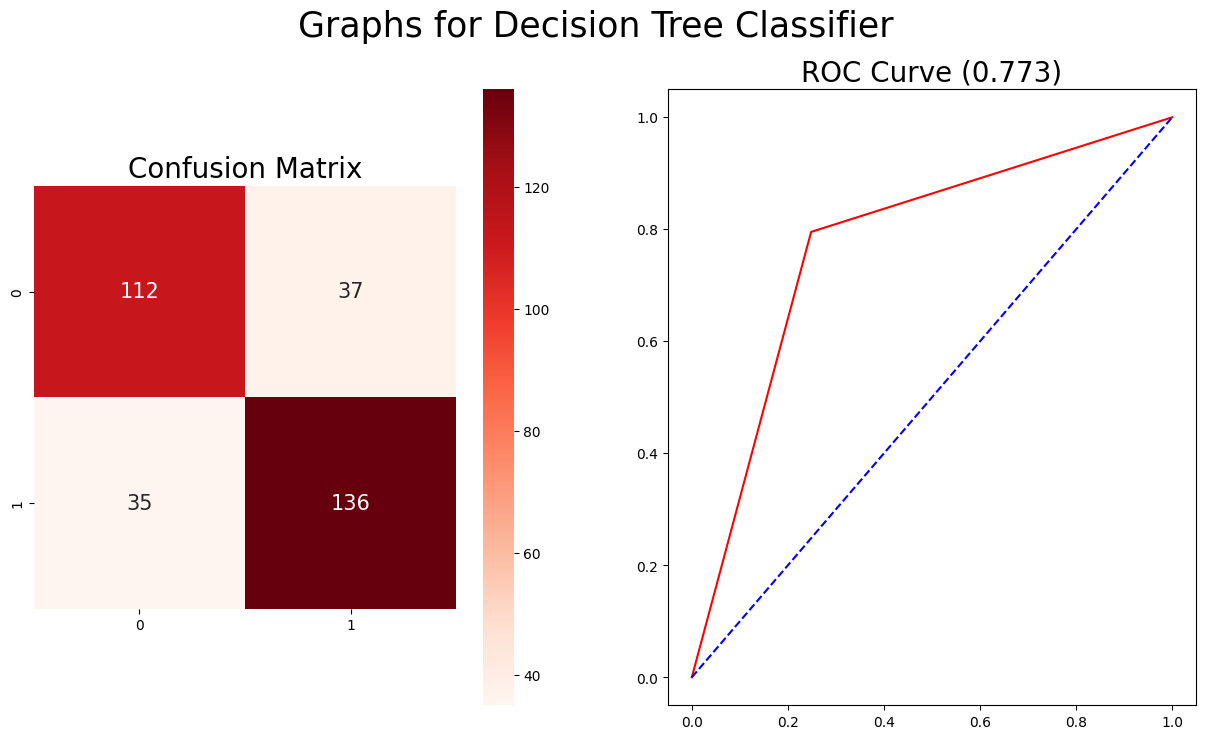

---For Random Forest Classifier---
Training Accuracy: 100.0%
Testing Accuracy: 84.0625%
F1 Score: 0.8530259365994236




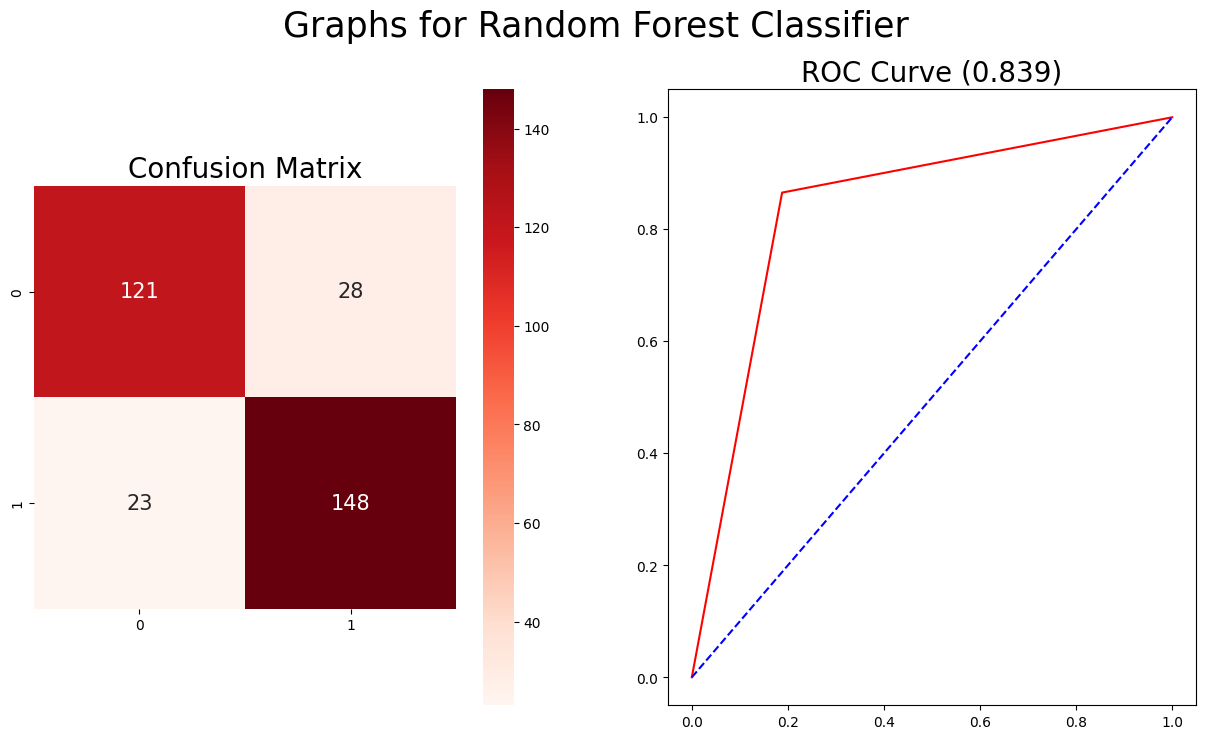

---For Gradient Boosting Classifier---
Training Accuracy: 87.33385457388584%
Testing Accuracy: 77.1875%
F1 Score: 0.7859237536656891




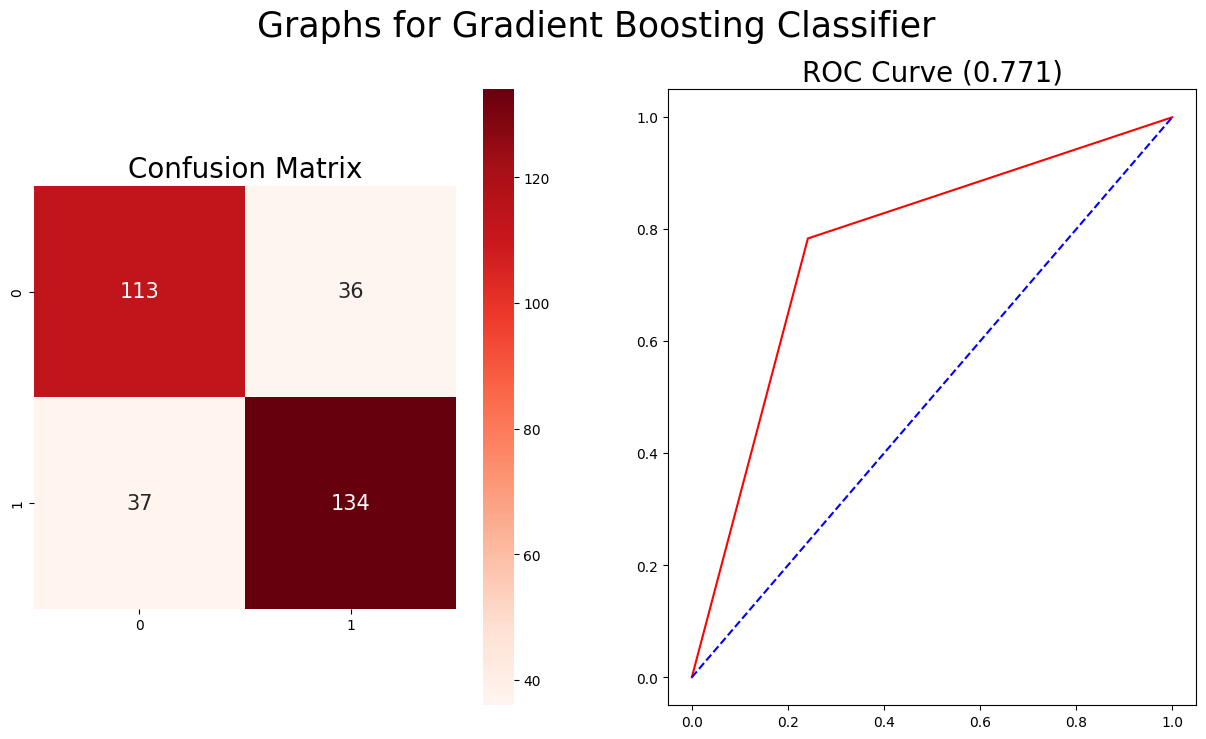

---For Ada Boost Classifier---
Training Accuracy: 78.18608287724786%
Testing Accuracy: 72.8125%
F1 Score: 0.7549295774647887




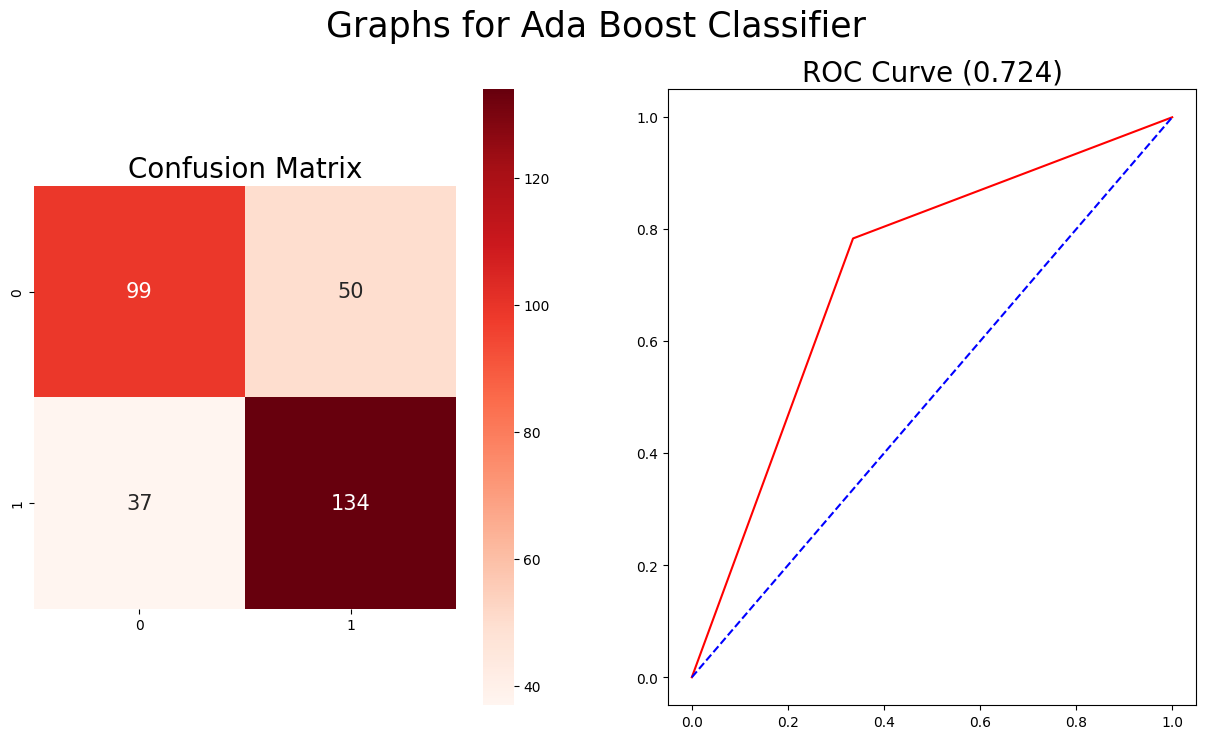

---For Cat Boost Classifier---
Training Accuracy: 93.58874120406567%
Testing Accuracy: 80.625%
F1 Score: 0.8165680473372781




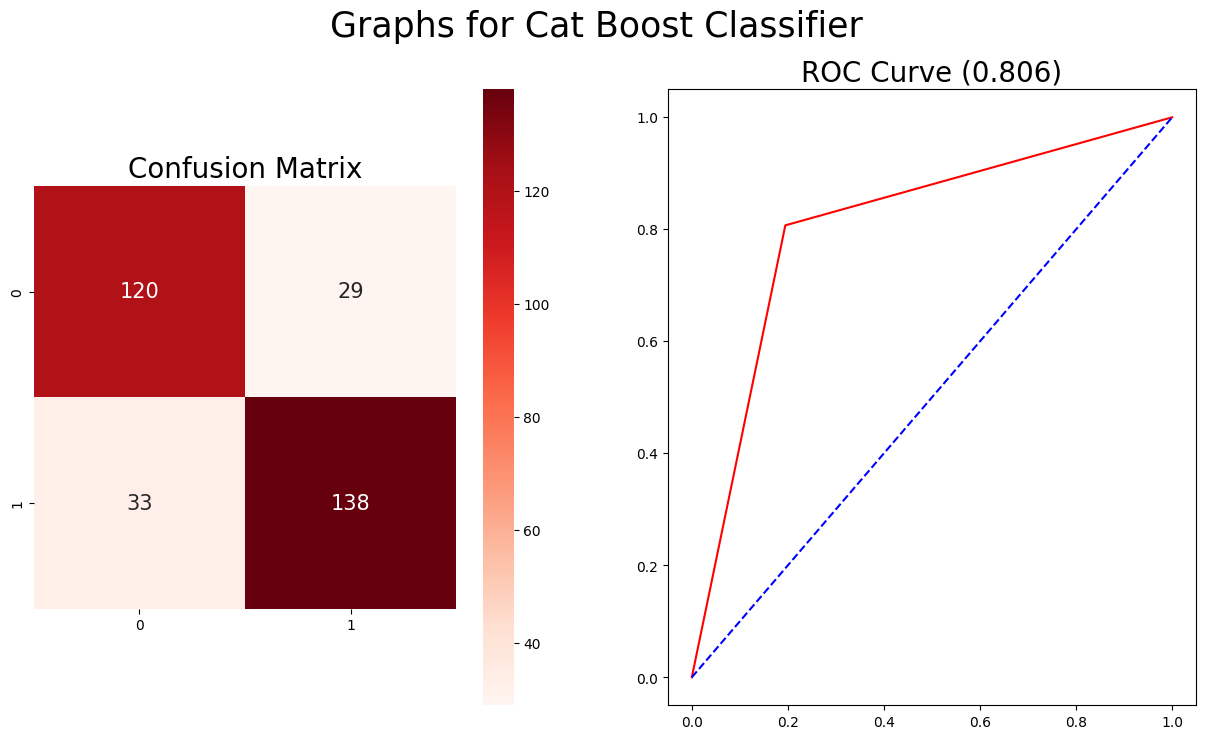

---For XGBoost Classifier---
Training Accuracy: 100.0%
Testing Accuracy: 81.25%
F1 Score: 0.8265895953757226




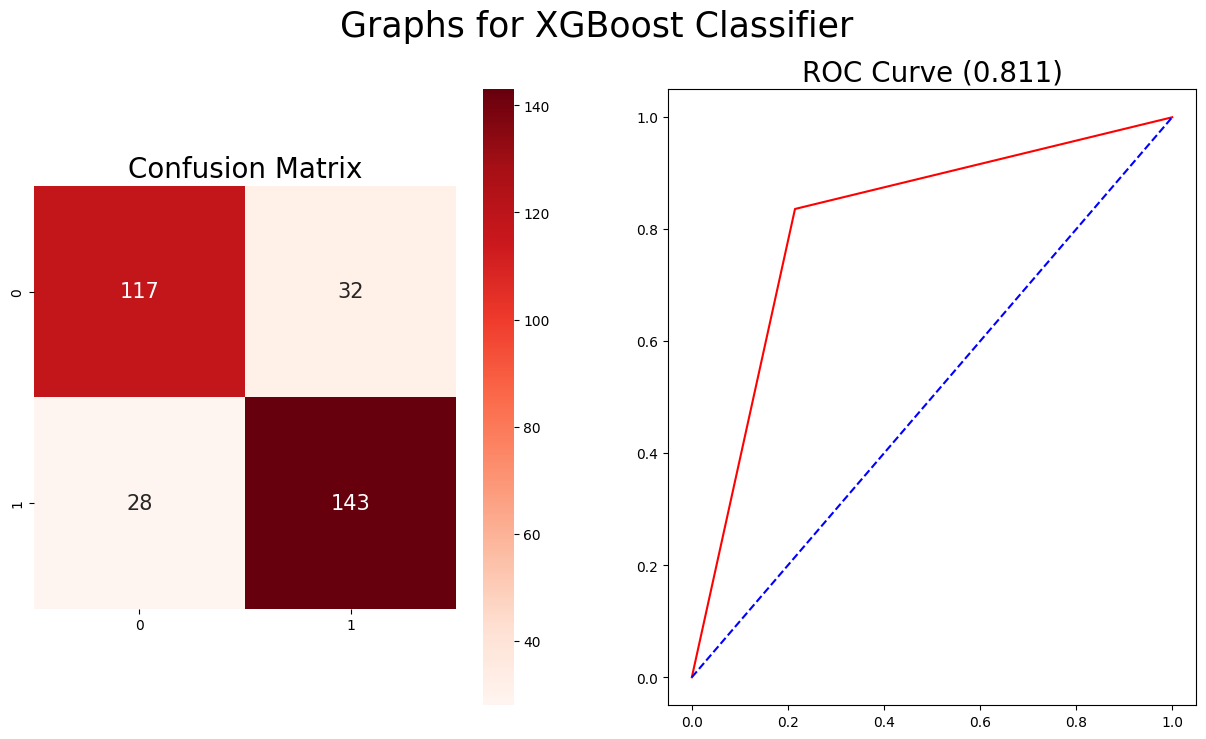

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 684, number of negative: 595
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534793 -> initscore=0.139397
[LightGBM] [Info] Start training from score 0.139397
---For Light Gradient Boosting Machine---
Training Accuracy: 100.0%
Testing Accuracy: 81.875%
F1 Score: 0.8313953488372092




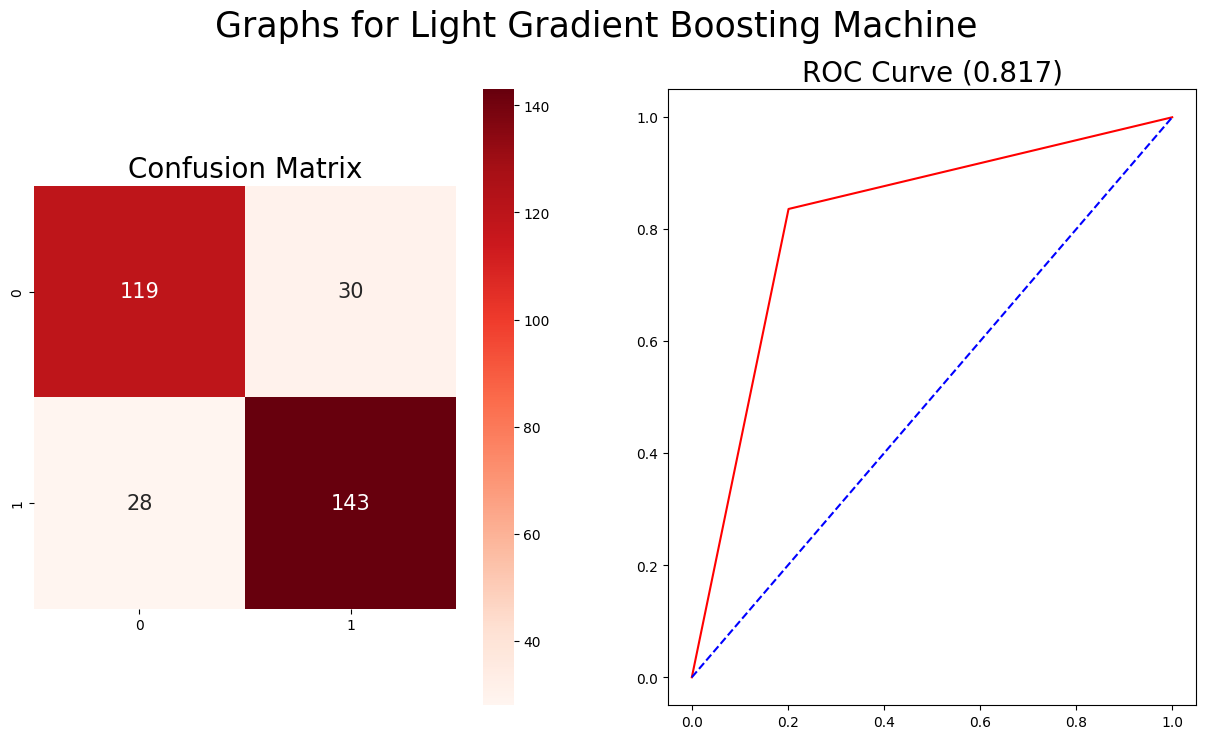

In [19]:
algo_name = []
accuracy = []


def display_results_and_graphs(algorithm_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = model.score(X_test, y_test)

    algo_name.append(algorithm_name)
    accuracy.append(acc_model)

    print(f"---For {algorithm_name}---")
    print(
        "Training Accuracy: {}%\nTesting Accuracy: {}%\nF1 Score: {}".format(
            model.score(X_train, y_train) * 100,
            model.score(X_test, y_test) * 100,
            f1_score(y_test, y_pred),
        )
    )
    print("\n")

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    fig.suptitle("Graphs for " + algorithm_name, fontsize=25)

    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Reds",
        annot_kws={"size": 15},
        square=True,
        fmt=".0f",
        ax=axes[0],
    )
    axes[0].set_title("Confusion Matrix", fontsize=20)

    fpr, tpr, threshould = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    sns.lineplot(x=fpr, y=tpr, ax=axes[1], color="red")
    axes[1].set_title("ROC Curve (" + str(round(roc_auc, 3)) + ")", fontsize=20)
    axes[1].plot(
        [0, 1],
        [
            0,
            1,
        ],
        "b--",
    )
    plt.show()


display_results_and_graphs("Logistic Regression", LogisticRegression())
display_results_and_graphs(
    "K Nearest Neighbors", KNeighborsClassifier(n_neighbors=13)
)
display_results_and_graphs("Support Vector Classifier", SVC())
display_results_and_graphs(
    "Decision Tree Classifier", DecisionTreeClassifier(random_state=10)
)
display_results_and_graphs("Random Forest Classifier", RandomForestClassifier())
display_results_and_graphs(
    "Gradient Boosting Classifier", GradientBoostingClassifier(random_state=10)
)
display_results_and_graphs(
    "Ada Boost Classifier", AdaBoostClassifier(random_state=0)
)
display_results_and_graphs(
    "Cat Boost Classifier", CatBoostClassifier(verbose=0)
)
display_results_and_graphs("XGBoost Classifier", XGBClassifier())
display_results_and_graphs(
    "Light Gradient Boosting Machine", lgbm.LGBMClassifier()
)

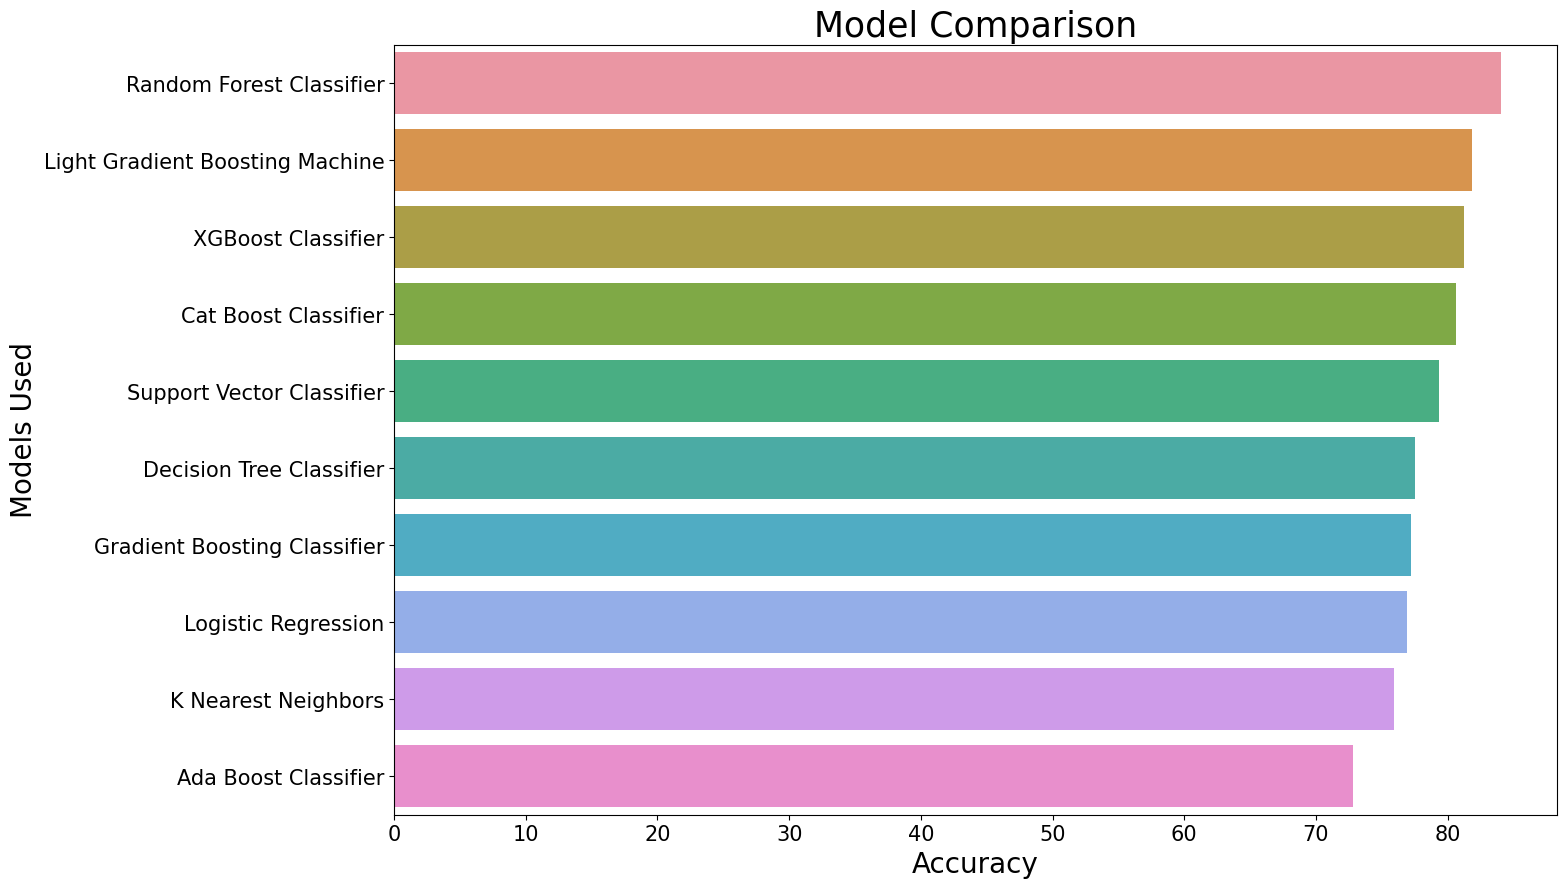

In [20]:
# model comparation
model_comparison = {}

for k, v in zip(algo_name, accuracy):
    model_comparison.update({k: v * 100})

model_comparison = dict(
    sorted(model_comparison.items(), key=lambda x: x[1], reverse=True)
)
models = list(model_comparison.keys())
accuracy = list(model_comparison.values())

plt.figure(figsize=(15, 10))
sns.barplot(x=accuracy, y=models)
plt.title("Model Comparison", fontsize=25)
plt.xlabel("Accuracy", fontsize=20)
plt.ylabel("Models used".title(), fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

**观察**
随机森林给出了最好的结果, 具有82.8125%的准确率. LGBM和XGBoost提供了第二和第三的
最好结果. 为了提升准确率, 将借助**Optuna**进行超参数优化.

# 使用`Optuna`进行超参数优化

Optuna是一个自动超参数优化框架, 为机器学习特别设计.

In [21]:
def objective(trial):
    param_grid = {
        "tree_method": "gpu_hist",
        "lambda": trial.suggest_loguniform("lambda", 1e-3, 10.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-3, 10.0),
        "colsample_bytree": trial.suggest_categorical(
            "colsample_bytree", [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        ),
        "subsample": trial.suggest_categorical(
            "subsample",
            [0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
        ),
        "learning_rate": trial.suggest_categorical(
            "learning_rate", [0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
        ),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, 50),
        "max_depth": trial.suggest_categorical(
            "max_depth", [5, 7, 9, 11, 13, 15, 17]
        ),
        "random_state": 0,
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 300),
    }

    model = XGBClassifier(**param_grid)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = model.score(X_test, y_test)

    return acc_model


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

[I 2023-08-01 18:31:54,638] A new study created in memory with name: no-name-25b8ca68-7933-4255-89d8-2ba0b20197dc
[I 2023-08-01 18:31:55,306] Trial 0 finished with value: 0.534375 and parameters: {'lambda': 0.007004038685186259, 'alpha': 0.001491260857527076, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01, 'n_estimators': 1000, 'max_depth': 15, 'min_child_weight': 164}. Best is trial 0 with value: 0.534375.
[I 2023-08-01 18:31:55,870] Trial 1 finished with value: 0.534375 and parameters: {'lambda': 0.008308675547941435, 'alpha': 0.29466313595873356, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'n_estimators': 900, 'max_depth': 5, 'min_child_weight': 288}. Best is trial 0 with value: 0.534375.
[I 2023-08-01 18:31:56,370] Trial 2 finished with value: 0.73125 and parameters: {'lambda': 0.003302355349323962, 'alpha': 0.05134114340944663, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.016, 'n_estimators': 550, 'max_depth': 13, 'min_chil

In [22]:
print("Number of finished trails:", len(study.trials))
print("Best Parameters:", study.best_trial.params)
print(
    "Improvement in XGBClassifier Accuracy: {}%".format(
        (
            (study.best_trial.value * 100)
            - (model_comparison["XGBoost Classifier"] / 100)
        )
    )
)

Number of finished trails: 300
Best Parameters: {'lambda': 5.149313851915358, 'alpha': 0.004644015955229921, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.016, 'n_estimators': 800, 'max_depth': 13, 'min_child_weight': 1}
Improvement in XGBClassifier Accuracy: 83.5625%


# 将超参数优化的结果可视化

In [23]:
optuna.visualization.plot_optimization_history(study)

In [24]:
optuna.visualization.plot_parallel_coordinate(study)

In [25]:
optuna.visualization.plot_slice(study)

In [26]:
optuna.visualization.plot_contour(study,params=['alpha','learning_rate','max_depth','n_estimators'])

In [27]:
optuna.visualization.plot_param_importances(study)

In [28]:
optuna.visualization.plot_edf(study)

In [29]:
X_train=X_train.drop(columns=['free sulfur dioxide'],axis=1)
temp=np.array(X_train)
X_train_nn=temp.reshape(-1,2,5,1)
print('New shape of training data:',X_train_nn.shape)

X_test=X_test.drop(columns=['free sulfur dioxide'],axis=1)
temp=np.array(X_test)
X_test_nn=temp.reshape(-1,2,5,1)
print('New shape of testing data:',X_test_nn.shape)

New shape of training data: (1279, 2, 5, 1)
New shape of testing data: (320, 2, 5, 1)


# 使用神经网络预测

In [30]:
model = Sequential(
    [
        Input(shape=(2, 5, 1)),
        Conv2D(32, 3, padding="same", activation="relu"),
        Conv2D(32, 3, padding="same", activation="relu"),
        Conv2D(32, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(64, 3, padding="same", activation="relu"),
        Conv2D(64, 3, padding="same", activation="relu"),
        Conv2D(64, 3, padding="same", activation="relu"),
        Conv2D(64, 3, padding="same", activation="relu"),
        Flatten(),
        Dropout(0.2),
        Dense(256, input_shape=(2, 5, 1), activation="relu"),
        Dense(128, activation="relu"),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["acc"],
)
reduce_lr = ReduceLROnPlateau(
    monitor="acc", patience=3, verbose=1, factor=0.5, min_lr=0.00001
)

2023-08-01 18:37:32.783903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 18:37:32.809905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 18:37:32.810097: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 18:37:32.810880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2, 5, 32)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 5, 32)          9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 5, 32)          9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 2, 32)         0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 2, 64)          18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 2, 64)          36928     
                                                        

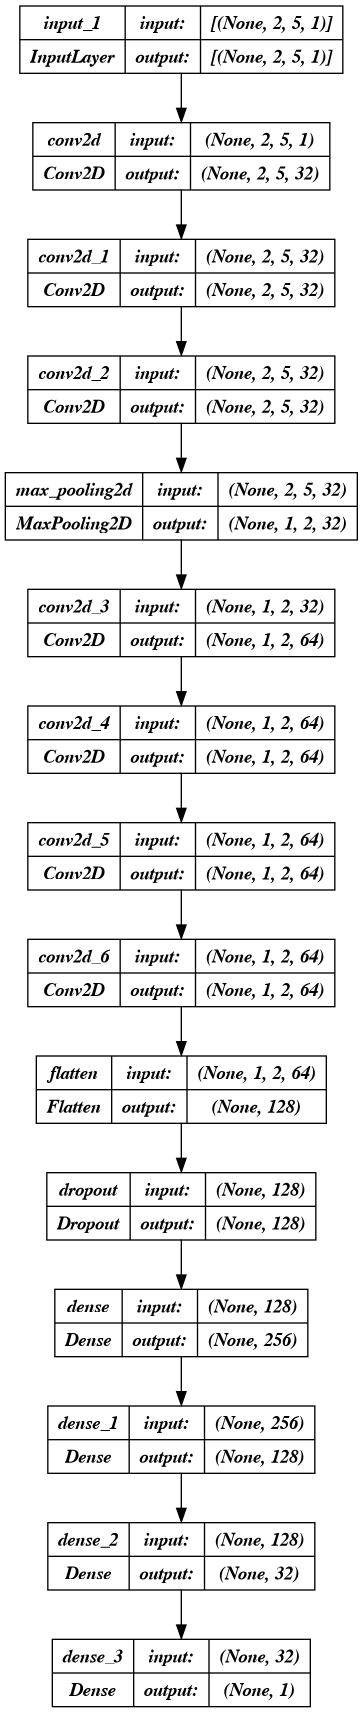

In [32]:
plot_model(model,show_shapes=True)

In [33]:
history=model.fit(X_train_nn,y_train,epochs=100,callbacks=[reduce_lr])

Epoch 1/100


2023-08-01 18:37:34.398968: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800
2023-08-01 18:37:34.932915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-01 18:37:34.988888: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f8b43887720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-01 18:37:34.988917: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-08-01 18:37:35.012622: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-01 18:37:35.220265: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the l

40/40 [==============================] - 4s 11ms/step - loss: 0.6577 - acc: 0.5590 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5783 - acc: 0.7037 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5262 - acc: 0.7279 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5052 - acc: 0.7287 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4951 - acc: 0.7529 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4862 - acc: 0.7576 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4746 - acc: 0.7709 - lr: 0.0010
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4631 - acc: 0.7709 - lr: 0.0010
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4580 - acc: 0.7733 - lr: 0.0010
Epoch 10/100
40/40 [============================

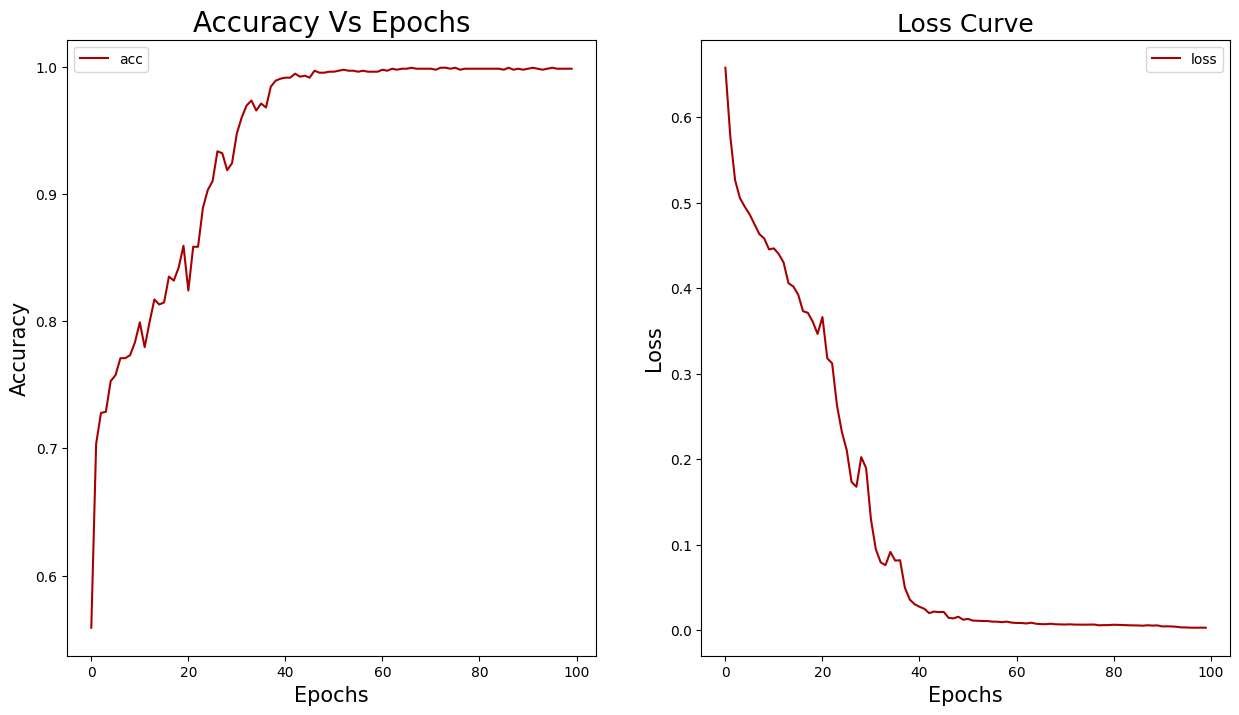

In [34]:
def model_performance_graphs(classifier):
    fig,axes=plt.subplots(1,2,figsize=(15,8))
    
    axes[0].plot(classifier.epoch,classifier.history['acc'],label='acc')
    axes[0].set_title('accuracy vs epochs'.title(),fontsize=20)
    axes[0].set_xlabel('Epochs',fontsize=15)
    axes[0].set_ylabel('Accuracy',fontsize=15
                       )
    axes[0].legend()
    
    axes[1].plot(classifier.epoch,classifier.history['loss'],label='loss')
    axes[1].set_title('loss curve'.title(),fontsize=18)
    axes[1].set_xlabel('Epochs',fontsize=15)
    axes[1].set_ylabel('Loss',fontsize=15)
    axes[1].legend()
    
    plt.show()
    
model_performance_graphs(history)

In [35]:
nn_train_acc=model.evaluate(X_train_nn,y_train)[-1]
nn_test_acc=model.evaluate(X_test_nn,y_test)[-1]
print(nn_train_acc,nn_test_acc)

10/10 [==============================] - 0s 2ms/step - loss: 4.2840 - acc: 0.7812
0.9992181658744812 0.78125


10/10 [==============================] - 0s 1ms/step
---For the Neural Network---
Training Accuracy: 99.92181658744812%
Testing Accuracy: 78.125%
F1-Score: 0.7965116279069767


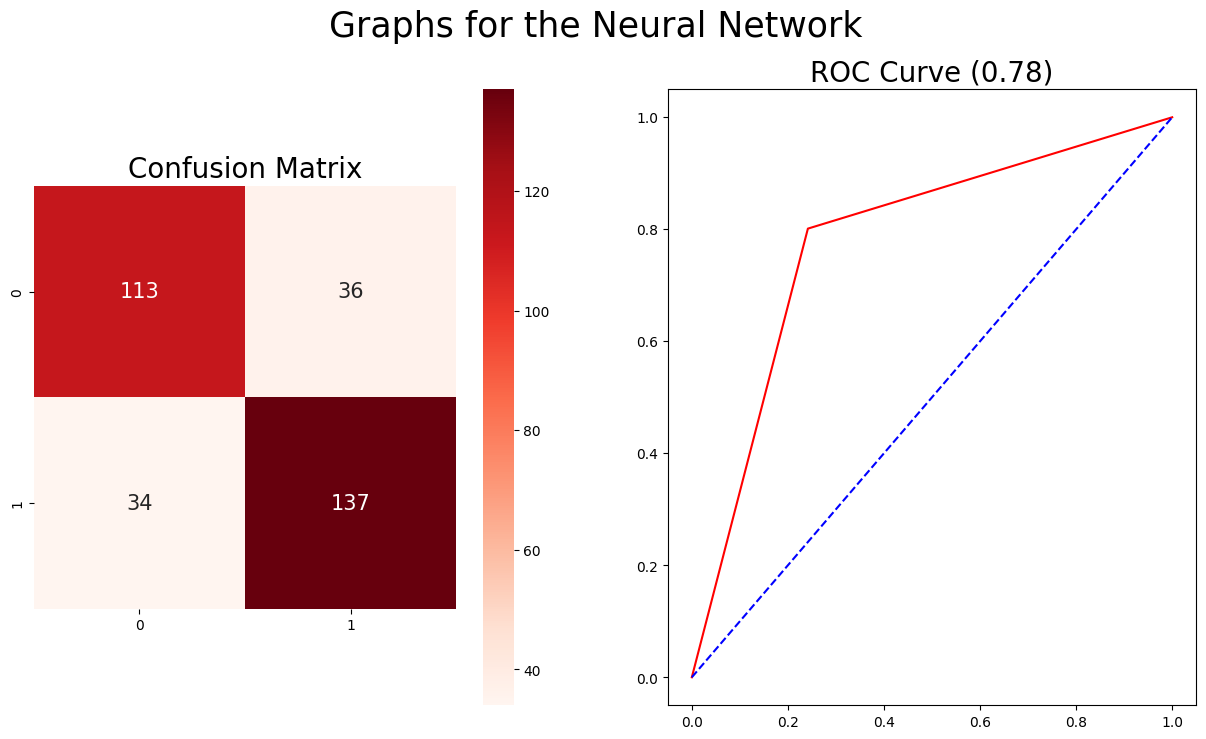

In [40]:
# RUC AOC of the Neural Network
y_pred = (model.predict(X_test_nn) > 0.5).astype(int)

print("---For the Neural Network---")
print(
    "Training Accuracy: {}%\nTesting Accuracy: {}%\nF1-Score: {}".format(
        nn_train_acc * 100, nn_test_acc * 100, f1_score(y_test, y_pred)
    )
)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle("Graphs for the Neural Network", fontsize=25)

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Reds",
    annot_kws={"size": 15},
    square=True,
    fmt=".0f",
    ax=axes[0],
)
axes[0].set_title("Confusion Matrix", fontsize=20)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
sns.lineplot(x=fpr, y=tpr, ax=axes[1], color="red")
axes[1].set_title("ROC Curve (" + str(round(roc_auc, 3)) + ")", fontsize=20)
axes[1].plot(
    [0, 1],
    [0, 1],
    "b--",
)
plt.show()